<a href="https://colab.research.google.com/github/nasku230/-traffic-sign-detection/blob/main/Traffic_signs_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SmartEye: REAL-TIME TRAFFIC SIGN DETECTION FOR AUTONOMOUS VEHICLES

YOLO-based detection system

Problem statement

Autonomous vehicles rely on real-time perception of the driving environment to ensure safety and regulatory compliance. One essential task is the accurate detection and classification of traffic signs, which communicate critical information such as speed limits, stop instructions, and warnings about road conditions.

Detecting traffic signs presents numerous challenges:

- Varying lighting conditions (e.g., night, glare, shadows)
- Adverse weather (e.g., rain, fog, snow)
- Occlusions by objects such as trees, poles, or other vehicles
Degraded, faded, or vandalized signs
- The need for real-time inference to support immediate driving decisions

Failure in traffic sign detection could lead to dangerous driving behavior, including failure to stop, inappropriate speed, or ignoring critical warnings. The problem this project addresses is the development of a robust, accurate, and fast traffic sign detection system suitable for deployment in autonomous vehicles.

https://www.mdpi.com/2079-9292/11/14/2162

Objectives

The main objectives of this project are:
1. Develop and train a YOLO-based object detection model capable of detecting and classifying traffic signs in varied real-world scenarios.

2. Achieve high detection performance, aiming for:

- Mean Average Precision (mAP) ≥ 90% at IoU threshold 0.5
- Precision and recall ≥ 90% for critical sign categories
3. Ensure real-time operation, with inference latency ≤ 50 milliseconds per frame on target hardware.

4. Evaluate robustness across challenging conditions including:

- Low light and glare
- Partial occlusions
- Weather distortions
5. Create a reproducible and scalable pipeline for training, validation, and testing, suitable for future extension (e.g., to other regions or sign types).

Methodology

The methodology involves several key steps:

- Dataset preparation: Acquire and preprocess a labeled dataset of traffic signs, including train/val/test splits, image augmentation, and annotation standardization.
- Model selection: Use the YOLO architecture (e.g., YOLOv8) due to its balance between detection accuracy and inference speed.
- Training: Fine-tune the YOLO model on the training data with augmentations simulating real-world challenges (e.g., brightness variation, occlusion).
- Validation: Monitor performance on the validation set to prevent overfitting and optimize hyperparameters.
- Testing: Evaluate the trained model on an independent test set and measure metrics (mAP, precision, recall, latency).
- Performance analysis: Identify failure cases, such as missed detections or false positives, and refine the model or dataset accordingly.

Dataset Description

The project uses a well-annotated dataset of traffic signs and video from Kaggle
path = kagglehub.dataset_download("pkdarabi/cardetection").

Dataset includes:
- Traffic sign image containing 4969 samples, it is correctly divided into three parts: Train, Valid, and Test.
 -RGB images from various driving conditions (urban, rural, highway)
- Annotations: bounding boxes + sign class labels
- Train/val/test split (e.g., 71% train, 16% val, 13% test)
- Classes: stop, yield, speed limit, no entry, warning signs, etc.
Augmentations applied:

Evaluation Plan

Success and failure will be determined through these criteria:


Metric	              Success Criteria         Failure Criteria
mAP@0.5	              ≥ 90%	                   < 80%
Precision	            ≥ 90%	                   < 85%
Recall	              ≥ 90%	                   < 85%
Latency per frame	    ≤ 50 ms	                 > 100 ms
Robustness	          Works in challenging     Significant degradation in
                      conditions	             performance under common
                                               conditions        


Deployment Plan

Once trained and evaluated, the traffic sign detection model needs to be deployed in a way that supports real-time operation on an autonomous vehicle platform. The deployment involves several key components:

Deployment targets:

- Edge devices: The model can be exported and run on embedded hardware such as NVIDIA Jetson (e.g., Xavier, Orin) or other automotive-grade AI accelerators.
- Onboard computer: Deployment to an in-vehicle computer running ROS (Robot Operating System) for integration with other perception and control modules.
- Cloud simulation (optional): Before physical deployment, model inference can be tested in driving simulators (e.g., CARLA, LGSVL).


Deployment steps:
1. Model export
Convert trained YOLO model to lightweight formats (e.g., TorchScript, ONNX, TensorRT) for optimized inference.

2. Integration
Connect the model’s inference outputs (bounding boxes, class labels) to vehicle decision-making modules, e.g., for speed control, braking, or steering adjustments.

3. Latency benchmarking
Measure real-time inference speed on target hardware (aiming for ≤ 50 ms/frame).

4. Field testing
Run the model on real or simulated driving data, checking for stable detection under various conditions.

5. Monitoring & updates
Design system to allow for over-the-air updates to improve or retrain the model as new data is collected.

YOLO Model Review

YOLO (You Only Look Once) is an advanced, real-time object detection system that predicts bounding boxes and class probabilities directly from full images in a single evaluation. According to its documentation by Ultralytics, YOLO is designed for speed, simplicity, and accuracy, making it ideal for tasks like traffic sign detection in autonomous vehicles.

Key highlights from the official documentation:

1. Unified architecture: YOLO models process the entire image at once, achieving faster detection compared to multi-stage detectors.
2. Real-time performance: YOLO can process images at high frame rates (often >30 FPS), supporting real-time applications.
3. Flexibility: YOLO supports easy training on custom datasets and exporting to various formats (ONNX, TorchScript, TensorRT) for deployment.
4. Accuracy: YOLO achieves competitive mAP while balancing speed, with support for small, medium, and large models to fit different hardware.

YOLO is widely recommended in its documentation for use cases where both accuracy and real-time inference are critical—like autonomous driving and traffic sign detection.

https://www.researchgate.net/publication/377216968_A_Review_on_YOLOv8_and_Its_Advancements

https://docs.ultralytics.com/models/yolov8/

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pkdarabi/cardetection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cardetection


In [15]:
import os

base_dir = "/kaggle/input/cardetection"  # Note the leading slash
if os.path.exists(base_dir):
    contents = os.listdir(base_dir)
    print(f"Contents of {base_dir}:")
    for item in contents:
        print(item)
else:
    print(f"Directory not found: {base_dir}")


Contents of /kaggle/input/cardetection:
car
video.mp4


In [16]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

cv2 for:
1. Loading and processing the images from "cardetection" dataset.
2. Visualizing the results of YOLO object detection model by drawing bounding boxes on the images or videos.
3. Performing any necessary image pre-processing before feeding the data into my YOLO model.
glob for:
1. Find all image files (e.g., .jpg, .png) within the dataset directory.
2.Locate specific files based on naming conventions within the dataset.
3. Gather a list of all the data files you need to process for training or inference.

In [17]:
# Import Essential Libraries
import os
import glob
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [18]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#e1f5fe'}, style='darkgrid')

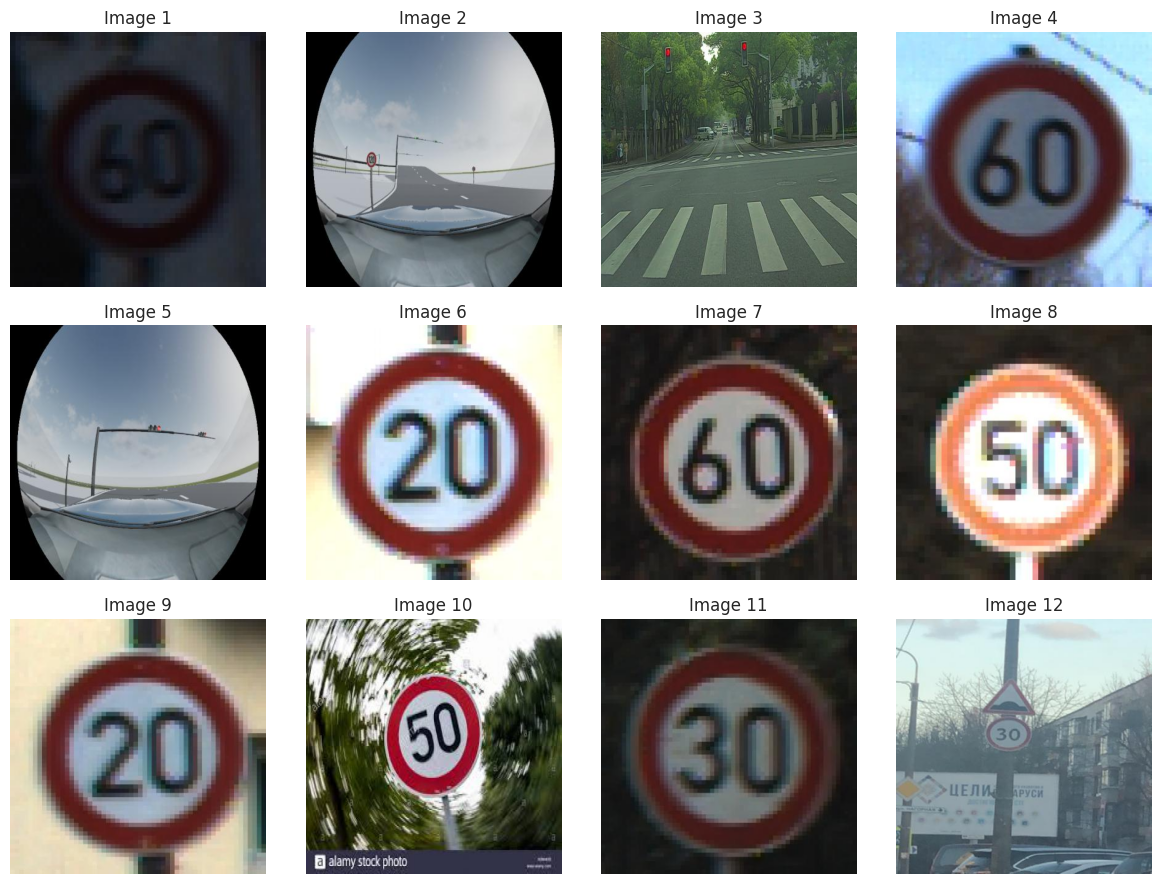

In [19]:
# Show some original images
# Use the 'path' variable from kagglehub.dataset_download to get the base directory
# Then construct the full path to the images directory
Image_dir = os.path.join(path, 'car', 'train', 'images')

num_samples = 12  # number of images
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

# adjust the subplot grid (3, 4 for 12 images)
fig, axes = plt.subplots(3, 4, figsize=(12, 9)) # Adjusted subplot grid

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 4, i % 4] # Adjusted indexing for 4 columns
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Get the size of the image

# Use the 'path' variable from kagglehub.dataset_download() to construct the image path
image_filename = "00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg"
image_path = os.path.join(path, 'car', 'train', 'images', image_filename)

# Check if the file exists before trying to read it
if os.path.exists(image_path):
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is not None:
        h, w, c = image.shape
        print(f"The image has dimensions {w}x{h} and {c} channels.")
    else:
        print(f"Error: Could not load image from path: {image_path}")
else:
    print(f"Error: Image file not found at path: {image_path}")

The image has dimensions 416x416 and 3 channels.


EDA

Check image and annotation formats: all images and annotations coudl be in the correct format for YOLO.

In [21]:
# dataset structure check: how many images per split?

import os
train_images = os.listdir('/kaggle/input/cardetection/car/train/images')
val_images = os.listdir('/kaggle/input/cardetection/car/valid/images')
test_images = os.listdir('/kaggle/input/cardetection/car/test/images')

print(f"Train images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Test images: {len(test_images)}")


Train images: 3530
Validation images: 801
Test images: 638


In [22]:
# class distribution

from collections import Counter

def count_classes(label_dir):
    counts = Counter()
    for file in os.listdir(label_dir):
        with open(os.path.join(label_dir, file)) as f:
            for line in f:
                class_id = int(line.split()[0])
                counts[class_id] += 1
    return counts

train_counts = count_classes('/kaggle/input/cardetection/car/train/labels')
print(f"Train class counts: {train_counts}")


Train class counts: Counter({1: 585, 0: 542, 7: 334, 12: 323, 11: 318, 10: 301, 6: 285, 14: 285, 9: 283, 3: 267, 5: 252, 8: 235, 13: 168, 4: 101, 2: 19})


In [23]:
# Bounding box characteristics analysis

import os
import pandas as pd
from tqdm import tqdm

# Paths
label_dir = '/kaggle/input/cardetection/car/train/labels'
image_dir = '/kaggle/input/cardetection/car/train/images'

# Collect box data
box_data = []

for label_file in tqdm(os.listdir(label_dir), desc="Processing labels"):
    label_path = os.path.join(label_dir, label_file)
    img_file = label_file.replace('.txt', '.jpg')  # or '.png' if you have PNGs
    img_path = os.path.join(image_dir, img_file)

    if not os.path.exists(img_path):
        print(f"Warning: Image {img_file} not found for label {label_file}")
        continue

    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            box_data.append({
                'file': img_file,
                'class_id': class_id,
                'x_center': x_center,
                'y_center': y_center,
                'width': width,
                'height': height,
                'area': width * height
            })

df_boxes = pd.DataFrame(box_data)

# Display head
print(df_boxes.head())


Processing labels: 100%|██████████| 3530/3530 [00:06<00:00, 571.86it/s]


                                                file  class_id  x_center  \
0  00000_00000_00004_png.rf.8737f80bd4f1455970179...         6  0.531250   
1  132fb160-d28e-4f53-9247-0ff9d3c89d78_jpg.rf.ef...         0  0.491587   
2  road498_png.rf.5af43c7f37d6d2107fbf072841a2241...        12  0.341346   
3  00004_00046_00003_png.rf.7e58451d1b55547109376...        11  0.530048   
4  00000_00005_00013_png.rf.df7aa74dd1d69d5cefa72...         6  0.530048   

   y_center     width    height      area  
0  0.566106  0.608173  0.562500  0.342097  
1  0.527644  0.628606  0.799279  0.502431  
2  0.376202  0.115385  0.106971  0.012343  
3  0.551683  0.545673  0.533654  0.291201  
4  0.514423  0.647837  0.659856  0.427479  


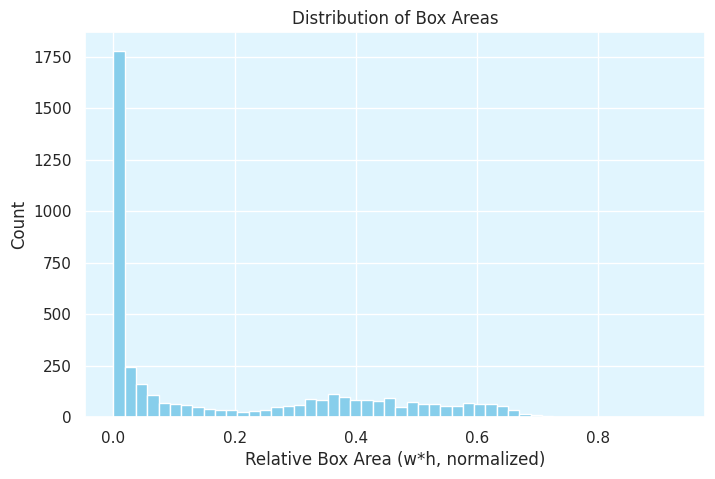

In [24]:
# distribution of box ares

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_boxes['area'], bins=50, color='skyblue')
plt.xlabel('Relative Box Area (w*h, normalized)')
plt.ylabel('Count')
plt.title('Distribution of Box Areas')
plt.grid(True)
plt.show()


Conclusion:
- wide distribution means many different sizes
- near 0.0 - small objects, typical sizes. it's challenging for object detection

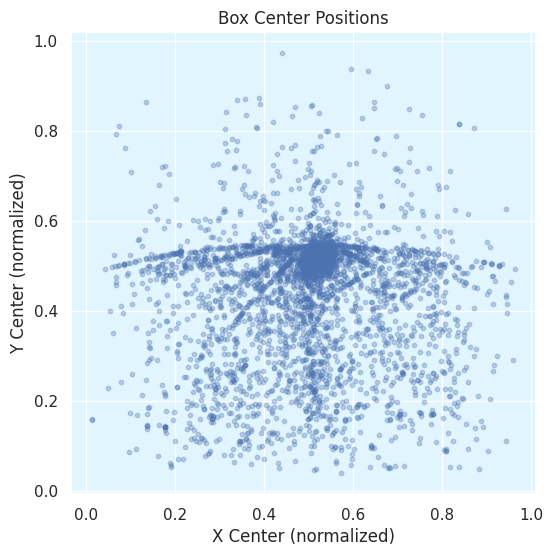

In [25]:
# show where objects appear in the image

plt.figure(figsize=(6,6))
plt.scatter(df_boxes['x_center'], df_boxes['y_center'], alpha=0.3, s=10)
plt.xlabel('X Center (normalized)')
plt.ylabel('Y Center (normalized)')
plt.title('Box Center Positions')
plt.grid(True)
plt.show()


Conclusion:
- in driving perspective image often seen in lower portion not in center
- in camera view it's typical angle and field of view
- potential bias in certain areas
- clustering means that objects appear in specific regions

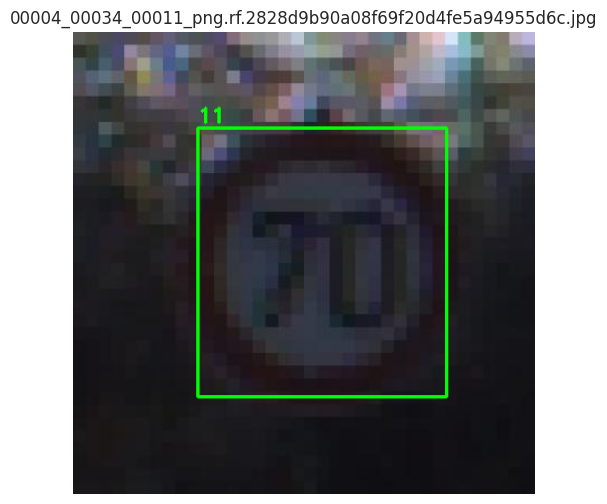

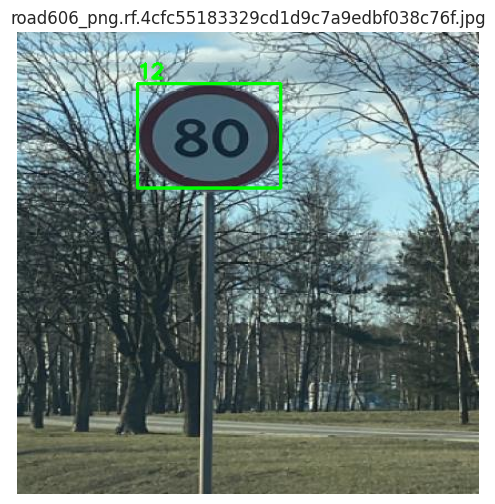

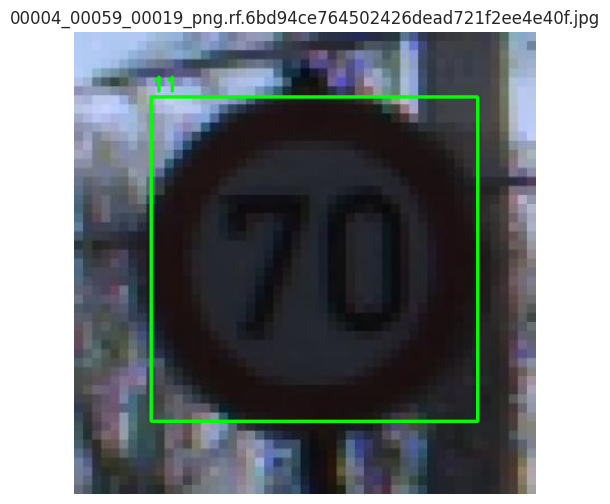

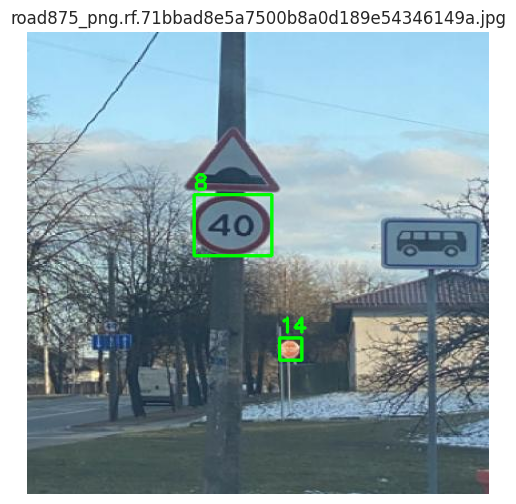

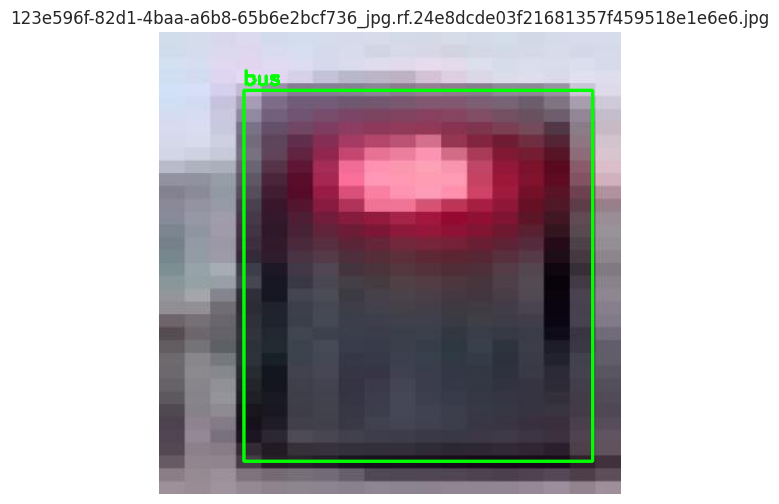

In [26]:
# draw bounding boxes + class labels
import os
import cv2
import matplotlib.pyplot as plt

# Paths
image_dir = '/kaggle/input/cardetection/car/train/images'
label_dir = '/kaggle/input/cardetection/car/train/labels'

# Class names (adjust if you have your own names or load from your data.yaml)
class_names = {
    0: 'car',
    1: 'bus',
    2: 'traffic light',
    # add more if needed
}

# Helper: Draw YOLO box on image
def draw_yolo_box(image, label_path):
    h, w = image.shape[:2]
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_c, y_c, bw, bh = map(float, parts[1:])
            # Convert normalized to absolute
            x_c *= w
            y_c *= h
            bw *= w
            bh *= h
            x1 = int(x_c - bw/2)
            y1 = int(y_c - bh/2)
            x2 = int(x_c + bw/2)
            y2 = int(y_c + bh/2)

            color = (0, 255, 0)
            cv2.rectangle(image, (x1,y1), (x2,y2), color, 2)
            label = class_names.get(class_id, str(class_id))
            cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return image

# Visualize a few random images
sample_images = os.listdir(image_dir)[:5]  # adjust number as needed

for img_file in sample_images:
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))  # or .png

    if not os.path.exists(label_path):
        print(f"No label for {img_file}, skipping.")
        continue

    img = cv2.imread(img_path)
    img = draw_yolo_box(img, label_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


In [27]:
# inspect image file (to get a list of image files, check the file extensions and opening a few images)

from PIL import Image
import os # Ensure os is imported if it wasn't before

# Use the 'path' variable from kagglehub.dataset_download()
image_dir = os.path.join(path, 'car', 'train', 'images') # Reusing the correct path structure

image_files = os.listdir(image_dir)

# Check the first few image files
for i in range(min(5, len(image_files))):
    image_path = os.path.join(image_dir, image_files[i])
    try:
        img = Image.open(image_path)
        print(f"Successfully opened image: {image_files[i]}, format: {img.format}, size: {img.size}")
        img.close()
    except Exception as e:
        print(f"Error opening image: {image_files[i]}, error: {e}")

Successfully opened image: 00004_00034_00011_png.rf.2828d9b90a08f69f20d4fe5a94955d6c.jpg, format: JPEG, size: (416, 416)
Successfully opened image: road606_png.rf.4cfc55183329cd1d9c7a9edbf038c76f.jpg, format: JPEG, size: (416, 416)
Successfully opened image: 00004_00059_00019_png.rf.6bd94ce764502426dead721f2ee4e40f.jpg, format: JPEG, size: (416, 416)
Successfully opened image: road875_png.rf.71bbad8e5a7500b8a0d189e54346149a.jpg, format: JPEG, size: (416, 416)
Successfully opened image: 123e596f-82d1-4baa-a6b8-65b6e2bcf736_jpg.rf.24e8dcde03f21681357f459518e1e6e6.jpg, format: JPEG, size: (416, 416)


In [28]:
# inspect annotation files

# Use the 'path' variable from kagglehub.dataset_download() to construct the correct paths
image_dir = os.path.join(path, 'car', 'train', 'images')
annotation_dir = os.path.join(path, 'car', 'train', 'labels') # Construct annotation path similarly

image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))] # Filter for image files

# Check the first few annotation files
for i in range(min(5, len(image_files))):
    image_filename = image_files[i]
    annotation_filename = os.path.splitext(image_filename)[0] + '.txt' # Assumes .txt extension for annotations
    annotation_path = os.path.join(annotation_dir, annotation_filename)

    if os.path.exists(annotation_path):
        print(f"Found annotation file: {annotation_filename}")
        try:
            with open(annotation_path, 'r') as f:
                lines = f.readlines()
                print(f"  Content of {annotation_filename}:")
                for line in lines:
                    print(f"    {line.strip()}")
                    # add more checks here, e.g., split the line and check if it has 5 values
                    parts = line.strip().split()
                    if len(parts) == 5:
                       try:
                          class_id = int(parts[0])
                          x_center, y_center, width, height = map(float, parts[1:])
                          # Further checks: Are x_center, y_center, width, height between 0 and 1?
                          if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
                               print(f"      Warning: Coordinates/dimensions out of range in {annotation_filename}: {line.strip()}")
                       except ValueError:
                           print(f"      Warning: Invalid numerical format in {annotation_filename}: {line.strip()}")
                    else:
                        print(f"      Warning: Incorrect number of values in line in {annotation_filename}: {line.strip()}")

        except Exception as e:
            print(f"Error reading annotation file: {annotation_filename}, error: {e}")
    else:
        print(f"No annotation file found for image: {image_filename}")

Found annotation file: 00004_00034_00011_png.rf.2828d9b90a08f69f20d4fe5a94955d6c.txt
  Content of 00004_00034_00011_png.rf.2828d9b90a08f69f20d4fe5a94955d6c.txt:
    11 0.5384615384615384 0.4987980769230769 0.5384615384615384 0.5805288461538461
Found annotation file: road606_png.rf.4cfc55183329cd1d9c7a9edbf038c76f.txt
  Content of road606_png.rf.4cfc55183329cd1d9c7a9edbf038c76f.txt:
    12 0.41586538461538464 0.22355769230769232 0.3088942307692308 0.22596153846153846
Found annotation file: 00004_00059_00019_png.rf.6bd94ce764502426dead721f2ee4e40f.txt
  Content of 00004_00059_00019_png.rf.6bd94ce764502426dead721f2ee4e40f.txt:
    11 0.5204326923076923 0.49158653846153844 0.7067307692307693 0.7019230769230769
Found annotation file: road875_png.rf.71bbad8e5a7500b8a0d189e54346149a.txt
  Content of road875_png.rf.71bbad8e5a7500b8a0d189e54346149a.txt:
    8 0.44591346153846156 0.4182692307692308 0.16826923076923078 0.1310096153846154
    14 0.5709134615384616 0.6862980769230769 0.046875 0.046

Check the class mapping file:
1. critical for understanding object detection
2. serve as a dictionary that links interger class IDs in annotation files to readable class names likes 'car'

In [29]:
# List of potential class mapping file paths
potential_paths = [
    '/kaggle/input/cardetection/car/classes.txt',
    '/kaggle/input/cardetection/car/data.yaml',
    '/kaggle/input/cardetection/car/train/classes.txt',
    '/kaggle/input/cardetection/car/train/data.yaml'
 ]

found_file = False
for class_mapping_path in potential_paths:
    if os.path.exists(class_mapping_path):
        print(f"Found class mapping file at: {class_mapping_path}")
        try:
            with open(class_mapping_path, 'r') as f:
                content = f.read()
                print("\nContent of the class mapping file:")
                print(content)
            found_file = True
            break # Stop searching once the file is found
        except Exception as e:
            print(f"Error reading class mapping file: {class_mapping_path}, error: {e}")

if not found_file:
    print("Class mapping file not found in the common locations. Please check your dataset directory structure.")

Found class mapping file at: /kaggle/input/cardetection/car/data.yaml

Content of the class mapping file:
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

roboflow:
  workspace: selfdriving-car-qtywx
  project: self-driving-cars-lfjou
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6


Analyzing the distribution and characteristics of data in detail.

In [30]:
# Count class occurrences
class_counts = Counter()
annotation_files = glob.glob(os.path.join(annotation_dir, '*.txt'))

for ann_file in annotation_files:
    try:
        with open(ann_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) > 0:
                    class_id = int(parts[0])
                    class_counts[class_id] += 1
    except Exception as e:
        print(f"Error reading annotation file {ann_file}: {e}")

print("Raw class counts:", class_counts) # Add this line for debugging

# Map class IDs to names for plotting (and printing)
class_labels = [class_names[i] if i < len(class_names) else f'Class {i}' for i in class_counts.keys()]
counts = list(class_counts.values())

print("Class labels for printing:", class_labels) # Add this line for debugging
print("Counts for printing:", counts) # Add this line for debugging

# To print the distribution as text:
print("\nClass Distribution:")
for i, label in enumerate(class_labels):
    print(f"{label}: {counts[i]} instances")

Raw class counts: Counter({1: 585, 0: 542, 7: 334, 12: 323, 11: 318, 10: 301, 6: 285, 14: 285, 9: 283, 3: 267, 5: 252, 8: 235, 13: 168, 4: 101, 2: 19})
Class labels for printing: ['Class 6', 'car', 'Class 12', 'Class 11', 'Class 7', 'Class 13', 'bus', 'Class 3', 'Class 10', 'Class 14', 'Class 4', 'Class 9', 'Class 8', 'Class 5', 'traffic light']
Counts for printing: [285, 542, 323, 318, 334, 168, 585, 267, 301, 285, 101, 283, 235, 252, 19]

Class Distribution:
Class 6: 285 instances
car: 542 instances
Class 12: 323 instances
Class 11: 318 instances
Class 7: 334 instances
Class 13: 168 instances
bus: 585 instances
Class 3: 267 instances
Class 10: 301 instances
Class 14: 285 instances
Class 4: 101 instances
Class 9: 283 instances
Class 8: 235 instances
Class 5: 252 instances
traffic light: 19 instances


In [31]:
# organize data
import os
import shutil
import random
import yaml
# Path to your downloaded dataset from kagglehub
dataset_base_path = '/kaggle/input/cardetection/car' # Assuming 'car' is the relevant subdirectory

# Define target directory for your organized dataset within Colab
organized_dataset_path = '/content/my_car_dataset'

# Define target subdirectories
train_img_dir = os.path.join(organized_dataset_path, 'train', 'images')
train_label_dir = os.path.join(organized_dataset_path, 'train', 'labels')
valid_img_dir = os.path.join(organized_dataset_path, 'valid', 'images')
valid_label_dir = os.path.join(organized_dataset_path, 'valid', 'labels')
test_img_dir = os.path.join(organized_dataset_path, 'test', 'images')
test_label_dir = os.path.join(organized_dataset_path, 'test', 'labels')

In [32]:
# Create target directories (create the new directiries where will) store split data
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(valid_img_dir, exist_ok=True)
os.makedirs(valid_label_dir, exist_ok=True)
os.makedirs(test_img_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)
print("Target directories created.")

Target directories created.



Splitting data, why?:
unbiased evaluation (reason for having val and test sets)
hyperparametr tuning and model selection (val set used to tune hyperparametrs, like leaning rate, batch size)
prevantive data leakage (info from val set doesn't leak into training process)
realistic performance assessment (the test set provides a final evaluation on completely unseen data)

In [33]:
# list and split files
# Get list of all image files in the original training directory
original_image_dir = os.path.join(dataset_base_path, 'train', 'images') # Assuming original images are here
original_label_dir = os.path.join(dataset_base_path, 'train', 'labels') # Assuming original labels are here

all_image_files = [f for f in os.listdir(original_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Shuffle the list of files
random.shuffle(all_image_files)

# Define split ratios (e.g., 80% train, 10% valid, 10% test)
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

train_count = int(len(all_image_files) * train_ratio)
valid_count = int(len(all_image_files) * valid_ratio)
# Test count will be the rest
test_count = len(all_image_files) - train_count - valid_count

train_files = all_image_files[:train_count]
valid_files = all_image_files[train_count : train_count + valid_count]
test_files = all_image_files[train_count + valid_count :]

print(f"Total images: {len(all_image_files)}")
print(f"Train images: {len(train_files)}")
print(f"Valid images: {len(valid_files)}")
print(f"Test images: {len(test_files)}")

Total images: 3530
Train images: 2824
Valid images: 353
Test images: 353


In [34]:
# copy files to target directories
# Function to copy image and label
def copy_files(file_list, src_img_dir, src_label_dir, dest_img_dir, dest_label_dir):
    for filename in file_list:
        # Copy image
        src_img_path = os.path.join(src_img_dir, filename)
        dest_img_path = os.path.join(dest_img_dir, filename)
        shutil.copy(src_img_path, dest_img_path)

        # Copy corresponding label
        label_filename = os.path.splitext(filename)[0] + '.txt'
        src_label_path = os.path.join(src_label_dir, label_filename)
        dest_label_path = os.path.join(dest_label_dir, label_filename)
        if os.path.exists(src_label_path): # Check if label file exists
             shutil.copy(src_label_path, dest_label_path)
        else:
             print(f"Warning: Label file not found for image {filename}")


print("Copying train files...")
copy_files(train_files, original_image_dir, original_label_dir, train_img_dir, train_label_dir)

print("Copying valid files...")
copy_files(valid_files, original_image_dir, original_label_dir, valid_img_dir, valid_label_dir)

print("Copying test files...")
copy_files(test_files, original_image_dir, original_label_dir, test_img_dir, test_label_dir)

print("File organization complete.")

Copying train files...
Copying valid files...
Copying test files...
File organization complete.


In [35]:
# create the data.yaml file

# Path for the data.yaml file
data_yaml_path = os.path.join(organized_dataset_path, 'data.yaml')

# Load class names from the original data.yaml if it exists
original_data_yaml = os.path.join(dataset_base_path, 'data.yaml')
class_names = ['car'] # Default if data.yaml not found or doesn't have names
if os.path.exists(original_data_yaml):
     try:
         with open(original_data_yaml, 'r') as f:
             original_data = yaml.safe_load(f)
             if 'names' in original_data:
                 class_names = original_data['names']
     except Exception as e:
         print(f"Error loading class names from original data.yaml: {e}")


data_yaml_content = {
     'path': organized_dataset_path, # Root path for YOLO
     'train': 'train/images',      # Path to train images relative to 'path'
     'val': 'valid/images',        # Path to validation images relative to 'path'
     'test': 'test/images',        # Path to test images relative to 'path'
     'nc': len(class_names),       # Number of classes
     'names': class_names          # List of class names
}

# Write the data.yaml file
with open(data_yaml_path, 'w') as f:
    yaml.dump(data_yaml_content, f, default_flow_style=None)

print(f"data.yaml created at: {data_yaml_path}")
print("Content of data.yaml:")
print(yaml.dump(data_yaml_content, default_flow_style=None))

data.yaml created at: /content/my_car_dataset/data.yaml
Content of data.yaml:
names: [Green Light, Red Light, Speed Limit 10, Speed Limit 100, Speed Limit 110,
  Speed Limit 120, Speed Limit 20, Speed Limit 30, Speed Limit 40, Speed Limit 50,
  Speed Limit 60, Speed Limit 70, Speed Limit 80, Speed Limit 90, Stop]
nc: 15
path: /content/my_car_dataset
test: test/images
train: train/images
val: valid/images



Pre-trained YOLOv8m.pt for detect trafic signs ('as is'):
1. load YOLO model
2. select random image
3. perform inference on one image at a time
4. visualize results
5. doesn't evalute the model's performance
6. doen't handle the full training pipeline

Using random image for prediction: /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00172_png.rf.7d72e18dcf6092088c75e2d009953ddc.jpg
Running prediction...

image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00172_png.rf.7d72e18dcf6092088c75e2d009953ddc.jpg: 640x640 1 boat, 37.2ms
Speed: 3.0ms preprocess, 37.2ms inference, 230.3ms postprocess per image at shape (1, 3, 640, 640)
Number of detected objects: 1
Detected Objects (confidences):
  Class 8 with confidence 0.31


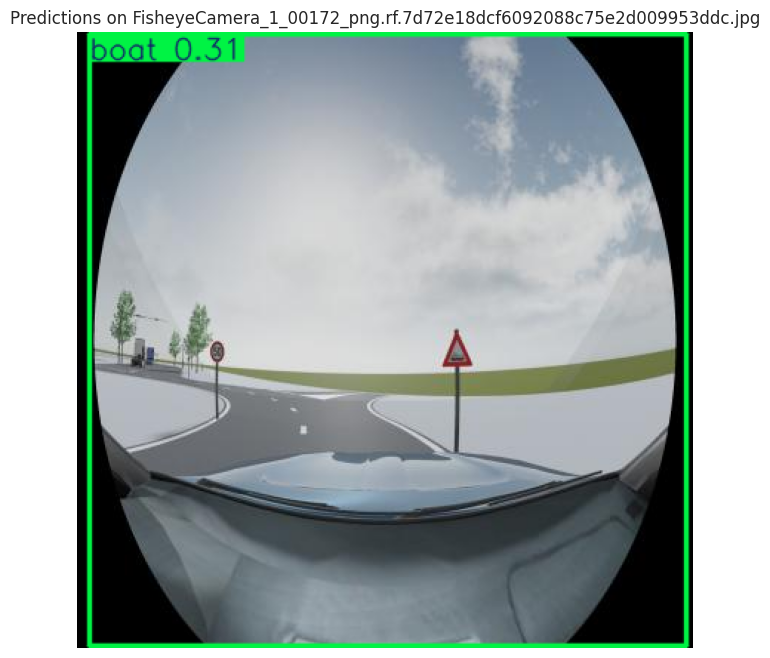

In [40]:
import os
import random
import cv2
from ultralytics import YOLO
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt # Import matplotlib for alternative display

# --- Code to get a random image path (from previous step) ---
image_dir = '/kaggle/input/cardetection/car/train/images'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Check if there are any image files
if image_files:
    # Select a random image file from the list
    random_image_filename = random.choice(image_files)

    # Construct the full path to the random image
    random_image_path = os.path.join(image_dir, random_image_filename)

    print(f"Using random image for prediction: {random_image_path}")

    # --- Code to load the model and perform prediction ---
    # Load a pre-trained YOLOv8m model
    model = YOLO("yolov8m.pt")

    # Use the model to detect object on the random image
    # Add a confidence threshold (conf) and potentially an IoU threshold (iou)
    # Lowering conf (e.g., to 0.25) might show more detections, including potentially false positives
    print("Running prediction...")
    result_predict = model.predict(source=random_image_path, imgsz=(640), conf=0.25) # Lower confidence threshold to see more detections

    # --- Inspection and Analysis ---
    if result_predict and result_predict[0]:
        predictions = result_predict[0].boxes # Get bounding boxes
        print(f"Number of detected objects: {len(predictions)}")
        if len(predictions) > 0:
            print("Detected Objects (confidences):")
            for box in predictions:
                 # box.conf is a tensor, convert to float
                 print(f"  Class {int(box.cls.item())} with confidence {box.conf.item():.2f}")
            # You can also print box coordinates and class IDs if needed
            # print(predictions)
        else:
            print("No objects detected above the confidence threshold.")

        # --- Code to show results ---
        # Get the plotted image (NumPy array with bounding boxes)
        plot = result_predict[0].plot()

        # Convert from BGR (OpenCV default) to RGB (for PIL/Matplotlib)
        plot_rgb = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)

        # Display the plotted image using Matplotlib (can sometimes be more reliable)
        plt.figure(figsize=(10, 8))
        plt.imshow(plot_rgb)
        plt.title(f"Predictions on {random_image_filename}")
        plt.axis('off')
        plt.show()

        # Also display using IPython.display.display as originally
        # display(Image.fromarray(plot_rgb))


    else:
        print("Prediction did not return valid results.")

else:
    print(f"No image files found in the directory: {image_dir}. Cannot perform prediction.")

Conclusion about pre-train:
- Model is working: it produces detections and labels.
- The architecture and forward pass function correctly.
- Not all classes are being predicted (missing detections).
- The speed shows the model is ready for real-time use.


Train YOLO model

Ensure the saving my train progress and then load the saved one.

In [42]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# creating a folder for my model
import os

checkpoint_dir = "/content/drive/My Drive/yolo_checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)


In [44]:
data_yaml_path = '/content/my_car_dataset/data.yaml'
with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)
#print(data)
import os
# Remove the os.listdir calls that were causing the error
# print(os.listdir('/content/'))
# print(os.listdir('/content/drive/MyDrive/YOLO_Training_Results'))
# print(os.listdir('/content/drive/MyDrive/YOLO_Training_Results/car_detection_run5'))
# print(os.listdir('/content/drive/MyDrive/YOLO_Training_Results/car_detection_run5/weights/'))

In [45]:
# specifying output directory in google drive

from ultralytics import YOLO
import os

# Path to created data.yaml file
data_yaml_path = '/content/my_car_dataset/data.yaml' # Make sure this isO_Training_Results' to your desired folder name
os.makedirs(output_dir, exist_ok=True) # Create the directory if it doesn't exist

# Load a pre-trained YOLOv8n model
model = YOLO("yolov8m.pt")

# Start training and specify the project directory in Google Drive
print(f"Starting training with data from: {data_yaml_path}")
results = model.train(data=data_yaml_path,
                      epochs=200,
                      imgsz=640,
                      batch=-1,
                      patience=50,
                      save=True,
                      save_period=1,
                      project=output_dir, # Specify the output directory in Drive
                      name='car_detection_run' # Give your training run a name
                    )

print("Training complete. Results saved to:", os.path.join(output_dir, 'car_detection_run')) the correct path

# Define the output directory in Google Drive
output_dir = '/content/drive/MyDrive/YOLO_Training_Results' # Change 'YOLO

Starting training with data from: /content/my_car_dataset/data.yaml
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/my_car_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=car_detection_run6, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

100%|██████████| 755k/755k [00:00<00:00, 33.9MB/s]

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3784381  ultralytics.nn.modules.head.Detect           [15, [192, 384, 576]]         
Model summary: 169 layers, 25,865,005 parameters, 25,864,989 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 155MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 782.9±212.0 MB/s, size: 21.0 KB)


train: Scanning /content/my_car_dataset/train/labels... 2824 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2824/2824 [00:01<00:00, 1439.45it/s]

train: New cache created: /content/my_car_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.53G reserved, 0.24G allocated, 13.98G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25865005       79.11         1.546         42.01         180.4        (1, 3, 640, 640)                    list
    25865005       158.2         2.127         35.66         122.8        (2, 3, 640, 640)                    list
    25865005       316.4         3.095         46.07         109.2        (4, 3, 640, 640)                    list
    25865005       632.9         4.809         79.84         151.2        (8, 3, 640, 640)                    list
    25865005        1266         8.

train: Scanning /content/my_car_dataset/train/labels.cache... 2824 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2824/2824 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 343.9±226.5 MB/s, size: 19.5 KB)


val: Scanning /content/my_car_dataset/valid/labels... 353 images, 0 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<00:00, 1167.53it/s]

val: New cache created: /content/my_car_dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/YOLO_Training_Results/car_detection_run6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      5.95G     0.8508      2.602      1.184         12        640: 100%|██████████| 189/189 [01:31<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        353        441      0.288      0.487      0.336      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      7.02G     0.7918      1.745      1.128          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.302      0.584      0.394        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      7.09G     0.8038      1.555      1.127          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.587      0.495       0.52      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      7.15G     0.7974       1.45      1.125         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]

                   all        353        441      0.723      0.509      0.581      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      7.21G     0.7565      1.314      1.095         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]

                   all        353        441      0.679      0.624      0.682      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      7.29G     0.7405      1.215      1.082         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.741      0.603      0.702      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      7.35G     0.7243       1.15      1.072         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.842      0.674      0.769       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      7.42G     0.7032       1.07      1.061         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.857      0.669      0.777      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.97G     0.6861      1.023      1.048          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.899      0.656      0.783      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      6.04G     0.6883      0.988      1.059         18        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.922      0.701      0.804      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.56G     0.6656     0.9677       1.05          5        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.883      0.691      0.801      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      6.63G     0.6635     0.9143      1.032         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441       0.87      0.733      0.823      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      6.69G     0.6589     0.8626      1.032         14        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.935       0.73      0.826      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      6.76G     0.6539     0.8531      1.034          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]

                   all        353        441      0.907      0.752      0.879      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      6.83G     0.6441     0.8387       1.03          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.931      0.748      0.849      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      6.89G     0.6296     0.8075      1.015          6        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.919      0.731      0.843      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      6.95G     0.6308     0.8155      1.022          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.926      0.778       0.86      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      7.03G     0.6315     0.8021      1.026         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.923      0.786      0.878      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       6.1G      0.613     0.7453      1.011          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.933      0.775      0.861      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      6.55G     0.6292     0.7574      1.019          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]

                   all        353        441      0.946       0.76      0.868      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      6.55G     0.6023     0.7565      1.007          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441       0.94      0.773      0.874      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      6.59G     0.6151     0.7171      1.015         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.844      0.839      0.884      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      6.66G     0.6193       0.75      1.014          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.887      0.842      0.878      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.72G     0.6036     0.7143      0.999          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.812      0.862      0.892      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      6.78G     0.6062     0.6966      1.009          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.846       0.85      0.898      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      6.85G     0.5944     0.6825      1.006          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.927      0.792      0.924      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.92G     0.6028     0.7184      1.004          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.897      0.841      0.903      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.99G     0.5889      0.674     0.9996          4        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.919      0.843       0.91      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      7.05G     0.5861     0.6824      1.003         10        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.901      0.813       0.91      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      7.15G     0.5801     0.6637     0.9945         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.873      0.873      0.915      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       6.1G     0.5887     0.6536     0.9971         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.875      0.879      0.903      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      6.86G     0.5794     0.6594      1.001          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.881      0.883      0.907      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      6.86G     0.5783     0.6451     0.9961         18        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.934      0.872      0.944      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      6.89G     0.5759     0.6392     0.9951         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.916      0.889      0.943      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      6.96G     0.5772     0.6382     0.9869          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.923      0.858      0.935      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      7.02G     0.5636     0.6195     0.9872          4        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.928      0.889       0.94      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      7.08G     0.5638     0.6226     0.9838          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.923      0.835      0.925       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.15G     0.5632       0.63     0.9902          6        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.902      0.895      0.939      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.22G     0.5662     0.6311     0.9838         10        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441       0.92      0.892      0.943        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      7.29G     0.5637     0.6086     0.9871          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.911      0.845      0.911      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      7.35G     0.5578     0.6277     0.9922          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441       0.94      0.878      0.948      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      7.42G     0.5608     0.6158     0.9875         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.934      0.871      0.939      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.93G     0.5559     0.6069     0.9886          5        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.959      0.881      0.945      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.93G     0.5443     0.6028     0.9802         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.917      0.895      0.951      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.94G     0.5621     0.5989     0.9806         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.918      0.902      0.943      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      6.16G     0.5458     0.5959     0.9766         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.896      0.927       0.94      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      6.26G     0.5571     0.5893     0.9859         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.906      0.902      0.948      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       6.4G     0.5446     0.5723     0.9765          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.936      0.891      0.946      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      6.58G     0.5423     0.5669     0.9726         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.962      0.883      0.951      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      6.91G     0.5347     0.5588     0.9728          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.945      0.904      0.955      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      6.98G     0.5455     0.5765     0.9781         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.913      0.897      0.931      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      7.04G     0.5307     0.5558     0.9646          3        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.957      0.903      0.957      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      7.15G     0.5314     0.5683     0.9683         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.944      0.897      0.951      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      7.37G     0.5238     0.5532     0.9683         16        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.952      0.912       0.95      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      6.18G     0.5252     0.5546     0.9688          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.925      0.909      0.952      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      6.94G     0.5268     0.5487     0.9639          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.938       0.91      0.955        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      6.94G     0.5254     0.5439      0.969          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.918      0.914      0.952      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      6.94G     0.5212     0.5436     0.9655          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.941      0.908      0.955      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      6.99G     0.5178     0.5534     0.9672          5        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.941      0.918      0.958      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      7.06G     0.5228     0.5332     0.9705          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.928      0.907      0.951       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      7.12G     0.5161     0.5224      0.962         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.949      0.908      0.956      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      7.19G     0.5199     0.5257     0.9639          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.925      0.923      0.954      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      7.27G     0.5214     0.5458     0.9667         13        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.947      0.909      0.952      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      7.33G     0.5284     0.5331     0.9643         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441       0.93        0.9      0.953      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      7.39G     0.5057     0.5277     0.9601          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441        0.9      0.903      0.947      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      6.19G     0.5095     0.5259     0.9622         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.55it/s]

                   all        353        441      0.932      0.911      0.958      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      6.64G     0.5113      0.519     0.9637          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441       0.95      0.916      0.954      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      6.68G     0.5072     0.5148      0.958          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.944      0.892      0.947      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      6.73G     0.5006     0.5052     0.9586          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.939      0.924      0.959      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      6.81G     0.5021     0.5019     0.9574         14        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.963      0.925       0.96      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      6.87G     0.5104     0.5071     0.9576         16        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.949      0.932      0.962      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      6.94G     0.4971     0.5123     0.9501          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.916      0.932      0.961      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200         7G     0.5007     0.5086     0.9552          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.943      0.935      0.959      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      7.07G     0.5014     0.4918     0.9583         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.952      0.933      0.961       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      7.14G     0.4931     0.4908      0.956          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.892       0.95      0.952      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      7.21G     0.4949     0.4962     0.9512          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.935      0.926      0.953      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      7.29G     0.4987     0.4921     0.9587          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.937      0.932      0.962      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      7.52G     0.4876     0.4905     0.9537         15        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.948      0.907      0.958      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      6.19G     0.5004     0.4982     0.9552          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441       0.95      0.931      0.965      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      6.64G     0.4874     0.4741     0.9496          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.933      0.927      0.963      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      6.64G     0.4878     0.4886     0.9502          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.933      0.924      0.951      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      6.71G     0.4892     0.4863     0.9538          6        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.925      0.917      0.961      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      6.78G     0.4877      0.492     0.9472          4        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.939      0.927      0.949      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      6.84G     0.4918      0.475      0.956          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.932      0.926       0.96      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200       6.9G     0.4846     0.4795     0.9474         13        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.932      0.919      0.961      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      6.98G     0.4723     0.4612     0.9419         14        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.901      0.926      0.955      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      6.06G     0.4791     0.4619     0.9469          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.889      0.945       0.95      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      6.51G     0.4863     0.4719     0.9489          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.946      0.915      0.958      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      6.51G     0.4695     0.4542     0.9423          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.945      0.921      0.961      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      6.57G     0.4753     0.4694     0.9424          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.922      0.948      0.965      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      6.64G     0.4694     0.4565     0.9423          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.939      0.923      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.71G     0.4722     0.4623     0.9432         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.922      0.933      0.961      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      6.76G     0.4688     0.4508     0.9401          6        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.936      0.935      0.965      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.84G     0.4621     0.4389     0.9445          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.946      0.917      0.963      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.91G     0.4625     0.4559     0.9432          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441       0.95       0.93      0.966      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      6.98G      0.463     0.4499     0.9411          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.928      0.953      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      7.03G     0.4616     0.4455     0.9426          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.951      0.912      0.962      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      7.21G     0.4505     0.4376     0.9363          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.964      0.908      0.962      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       7.3G     0.4609     0.4452     0.9406         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.953      0.924      0.963      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      7.44G     0.4592     0.4432     0.9328         13        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.946      0.927      0.965      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      6.06G     0.4515     0.4443     0.9361         13        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.931      0.936      0.962      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.06G     0.4539     0.4318     0.9356         15        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.955      0.915      0.963      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.86G     0.4517     0.4338     0.9368          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.941      0.939      0.965      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.92G     0.4513     0.4328     0.9343          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.932       0.94      0.963      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      6.98G     0.4521     0.4339     0.9397          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441       0.92      0.928      0.961      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      7.06G     0.4434      0.423     0.9377          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.925      0.942      0.957      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      7.12G     0.4528     0.4293     0.9338          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.941      0.932      0.964      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      7.19G     0.4411     0.4291     0.9329          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.968      0.928      0.968      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      7.25G     0.4473      0.429     0.9341         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.936      0.936      0.962      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      7.32G     0.4346     0.4136     0.9289          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.922      0.945      0.954      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      7.39G     0.4492      0.423     0.9343          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.927      0.931      0.947       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.15G     0.4354      0.401      0.922          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.934      0.932      0.965      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      6.15G     0.4377     0.4045     0.9321          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.934      0.942      0.955      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      6.18G     0.4397      0.415     0.9286          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.929      0.942      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      6.25G     0.4407     0.4107     0.9286         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.947      0.922      0.956      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      6.32G     0.4347     0.4062     0.9277          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.938      0.931      0.945      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      6.41G     0.4319     0.4035      0.922         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.935      0.965      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      6.59G     0.4301     0.4067     0.9237         14        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.934      0.941      0.966      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      6.71G      0.421     0.3936     0.9224         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.937      0.936      0.969      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      6.87G      0.427     0.4067     0.9248          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.942      0.942      0.968      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      7.04G      0.419     0.3952     0.9229         13        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.946      0.941      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      7.21G     0.4247     0.4063     0.9215         16        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.941      0.939      0.968      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      7.31G     0.4203     0.3975     0.9192          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.941      0.934      0.965      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      6.15G     0.4097     0.3832     0.9206         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.942      0.936      0.967       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      6.91G     0.4206     0.3886     0.9235         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.932      0.931      0.962      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      6.91G     0.4199     0.3975     0.9246         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.937      0.929      0.964      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      6.91G     0.4185     0.3976     0.9217          6        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.929      0.938      0.965      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      6.97G     0.4152     0.3809     0.9203          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.934      0.932      0.966      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      7.03G     0.4037     0.3877     0.9211          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.935      0.932      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      7.11G     0.4095     0.3801     0.9191         14        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.932      0.939      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      7.17G        0.4     0.3719     0.9174          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.937      0.938      0.958      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      7.24G      0.405     0.3852     0.9211          8        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.959       0.94      0.969      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200       7.3G     0.3984     0.3793     0.9149         10        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]

                   all        353        441      0.966      0.926      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      7.38G     0.4064     0.3847     0.9189          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.943      0.938      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      6.15G     0.4051     0.3704     0.9157         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.936      0.942      0.966      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       6.6G     0.4027     0.3736     0.9203         10        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.944      0.941      0.965      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      6.63G     0.4118     0.3764     0.9177          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.946      0.937      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      6.71G     0.3977     0.3754     0.9102         16        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.943      0.937      0.965      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      6.78G     0.3961     0.3653     0.9137          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.942      0.941      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      6.84G     0.3973     0.3671     0.9104          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.935      0.944      0.969      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200       6.9G     0.3928     0.3672     0.9206         10        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441       0.93       0.94      0.967      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      6.98G     0.3964      0.358      0.912          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.941      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      7.04G     0.3893     0.3574     0.9093          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.946      0.938       0.97      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      7.11G     0.3879     0.3669     0.9084          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.942      0.936      0.968      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      7.17G     0.3841     0.3588     0.9088          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.941      0.941      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      7.36G     0.3867     0.3489     0.9109          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.937      0.938      0.967      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      7.43G     0.3818     0.3589      0.908         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441       0.93      0.943      0.966      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      5.98G     0.3851     0.3609     0.9124         13        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441       0.93      0.942      0.966      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      5.98G     0.3846     0.3566     0.9109         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441       0.94      0.934      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      6.01G     0.3808     0.3498     0.9061          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.942      0.938      0.968      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200       6.1G     0.3759     0.3486     0.9061         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.935      0.945      0.971      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      6.26G     0.3749     0.3394     0.9089         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.941      0.938       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      6.41G     0.3721     0.3354      0.903          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.943      0.939      0.971      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      6.61G     0.3642     0.3379     0.9024          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441       0.94      0.943      0.969      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      6.71G     0.3671     0.3435     0.9015         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.943      0.935      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      6.83G     0.3728     0.3453     0.9039          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.935      0.939      0.968      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      7.01G     0.3732     0.3421     0.9099          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.937      0.943      0.969      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      7.19G     0.3599     0.3477     0.9035          3        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.933      0.945      0.971      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      7.31G     0.3754      0.343     0.9106         13        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.925      0.952       0.97      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      7.45G     0.3674     0.3424     0.9066          6        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.927      0.948       0.97      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.05G     0.3647     0.3305      0.903          9        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.933      0.945       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      6.05G     0.3561      0.327     0.9038         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.60it/s]

                   all        353        441      0.939      0.947      0.971      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      6.87G     0.3626       0.33     0.9017         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.936      0.947      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      6.94G     0.3623     0.3318     0.9052          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.943       0.94       0.97      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      6.99G     0.3557     0.3228     0.9008          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.939      0.944       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      7.07G     0.3565     0.3174      0.898         10        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.943      0.939      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      7.14G      0.356     0.3157     0.9033         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.938      0.968      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200       7.2G      0.357     0.3176     0.8953         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.933      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      7.26G     0.3557     0.3209     0.8987         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.935      0.967      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      7.34G     0.3531     0.3119     0.8997         13        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.934      0.939      0.969      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200       7.4G     0.3513     0.3207     0.9003          5        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.936      0.941      0.968      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      6.14G     0.3549     0.3216     0.8983         13        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.928      0.948      0.969      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      6.14G     0.3493     0.3164     0.8974          6        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.937      0.942      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      6.18G     0.3459      0.309      0.895          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.941      0.944      0.968      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       6.7G      0.348      0.312     0.8953          3        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.936      0.945      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      6.77G     0.3437     0.3177     0.8973          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.942      0.944      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      6.83G     0.3425     0.3114     0.8992         13        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.939      0.946      0.968      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200       6.9G     0.3369      0.311     0.8945          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441       0.94      0.944      0.969      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      6.97G      0.355     0.3106     0.8975         12        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.939      0.943      0.971      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      7.04G     0.3331     0.3036     0.8879          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.939      0.943      0.969      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      7.09G     0.3412     0.3038     0.8945          8        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.933      0.949       0.97      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      7.17G     0.3368     0.3064     0.8932         10        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.935      0.948       0.97      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      7.35G      0.339      0.315     0.8983          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]

                   all        353        441      0.943      0.942      0.969      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      7.45G     0.3287     0.2903     0.8896         12        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.936      0.945      0.969      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      6.06G     0.3317     0.2881      0.893          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.944      0.941      0.968      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      6.06G     0.3281     0.2897     0.8928          9        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441       0.94      0.948       0.97      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      6.57G     0.3331     0.2896     0.8902          7        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.943      0.945       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      6.64G     0.3272     0.2979     0.8896         11        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.945      0.941      0.971      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       6.7G     0.3275      0.296     0.8919         14        640: 100%|██████████| 189/189 [01:28<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.943      0.942      0.971      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      6.77G     0.3206      0.296     0.8891         11        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.942      0.943      0.971       0.84


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      6.84G     0.3158     0.1856     0.8401          4        640: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.944       0.97      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200       6.9G     0.3198     0.1841     0.8423          7        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.941      0.941       0.97      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      6.96G     0.3126     0.1812     0.8377          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.937      0.944      0.969      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      7.04G     0.3066     0.1799     0.8395          4        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.937      0.942       0.97      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      7.17G     0.3062     0.1786     0.8376          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.938      0.944       0.97      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      7.33G     0.2979     0.1799     0.8373          4        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.57it/s]

                   all        353        441      0.938      0.942       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      7.44G     0.3016     0.1766     0.8415          4        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.937      0.942      0.971       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      6.23G     0.3039      0.179     0.8355          5        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.937      0.943       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      6.99G     0.3046     0.1807     0.8355          4        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.59it/s]

                   all        353        441      0.939      0.943      0.958      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      6.99G     0.3012     0.1757     0.8316          3        640: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.58it/s]

                   all        353        441      0.938      0.943      0.959      0.832



200 epochs completed in 5.265 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/weights/last.pt, 52.1MB
Optimizer stripped from /content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/weights/best.pt, 52.1MB

Validating /content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]


                   all        353        441      0.937      0.943      0.969      0.843
           Green Light         39         55      0.893      0.836      0.894      0.506
             Red Light         39         52      0.886      0.745      0.885       0.55
        Speed Limit 10          2          2      0.614          1      0.995      0.895
       Speed Limit 100         27         28      0.958          1      0.995      0.901
       Speed Limit 110         10         11      0.959          1      0.995      0.951
       Speed Limit 120         28         30      0.957          1      0.995      0.914
        Speed Limit 20         29         30          1       0.95      0.989      0.918
        Speed Limit 30         38         39      0.969      0.949      0.956      0.865
        Speed Limit 40         24         26      0.979      0.962      0.991      0.873
        Speed Limit 50         21         22      0.946      0.955      0.961      0.853
        Speed Limit 6

In [67]:
# copy checkpoins to another location in drive
!cp /content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/last.pt /content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/backup_last.pt

Checking local directory

In [61]:
import os

# Mount Google Drive if not already mounted
# This block is repeated for clarity, but you should only need to mount once per session
from google.colab import drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# --- Original problematic line (removed) ---
# content/runs/train/exp/

# --- Suggested change: List the contents of the expected run directory ---
# This directory is usually created by Ultralytics YOLO for temporary results in Colab
run_dir_path = "/content/runs/train/exp/"

print(f"Checking contents of local run directory: {run_dir_path}")

if os.path.exists(run_dir_path):
    try:
        print(os.listdir(run_dir_path))
    except Exception as e:
        print(f"Could not list directory {run_dir_path}: {e}")
else:
    print(f"Local run directory not found: {run_dir_path}")
    print("YOLO results were likely saved directly to your Google Drive.")

# As a reminder, you already have code to list the contents of your Google Drive results directory:
# output_dir = '/content/drive/MyDrive/YOLO_Training_Results' # Change if needed
# run_name = 'car_detection_run' # Change if needed
# drive_run_results_path = os.path.join(output_dir, run_name)
# if os.path.exists(drive_run_results_path):
#     print(f"\nContents of Google Drive training run directory ({drive_run_results_path}):")
#     print(os.listdir(drive_run_results_path))

Checking contents of local run directory: /content/runs/train/exp/
Local run directory not found: /content/runs/train/exp/
YOLO results were likely saved directly to your Google Drive.


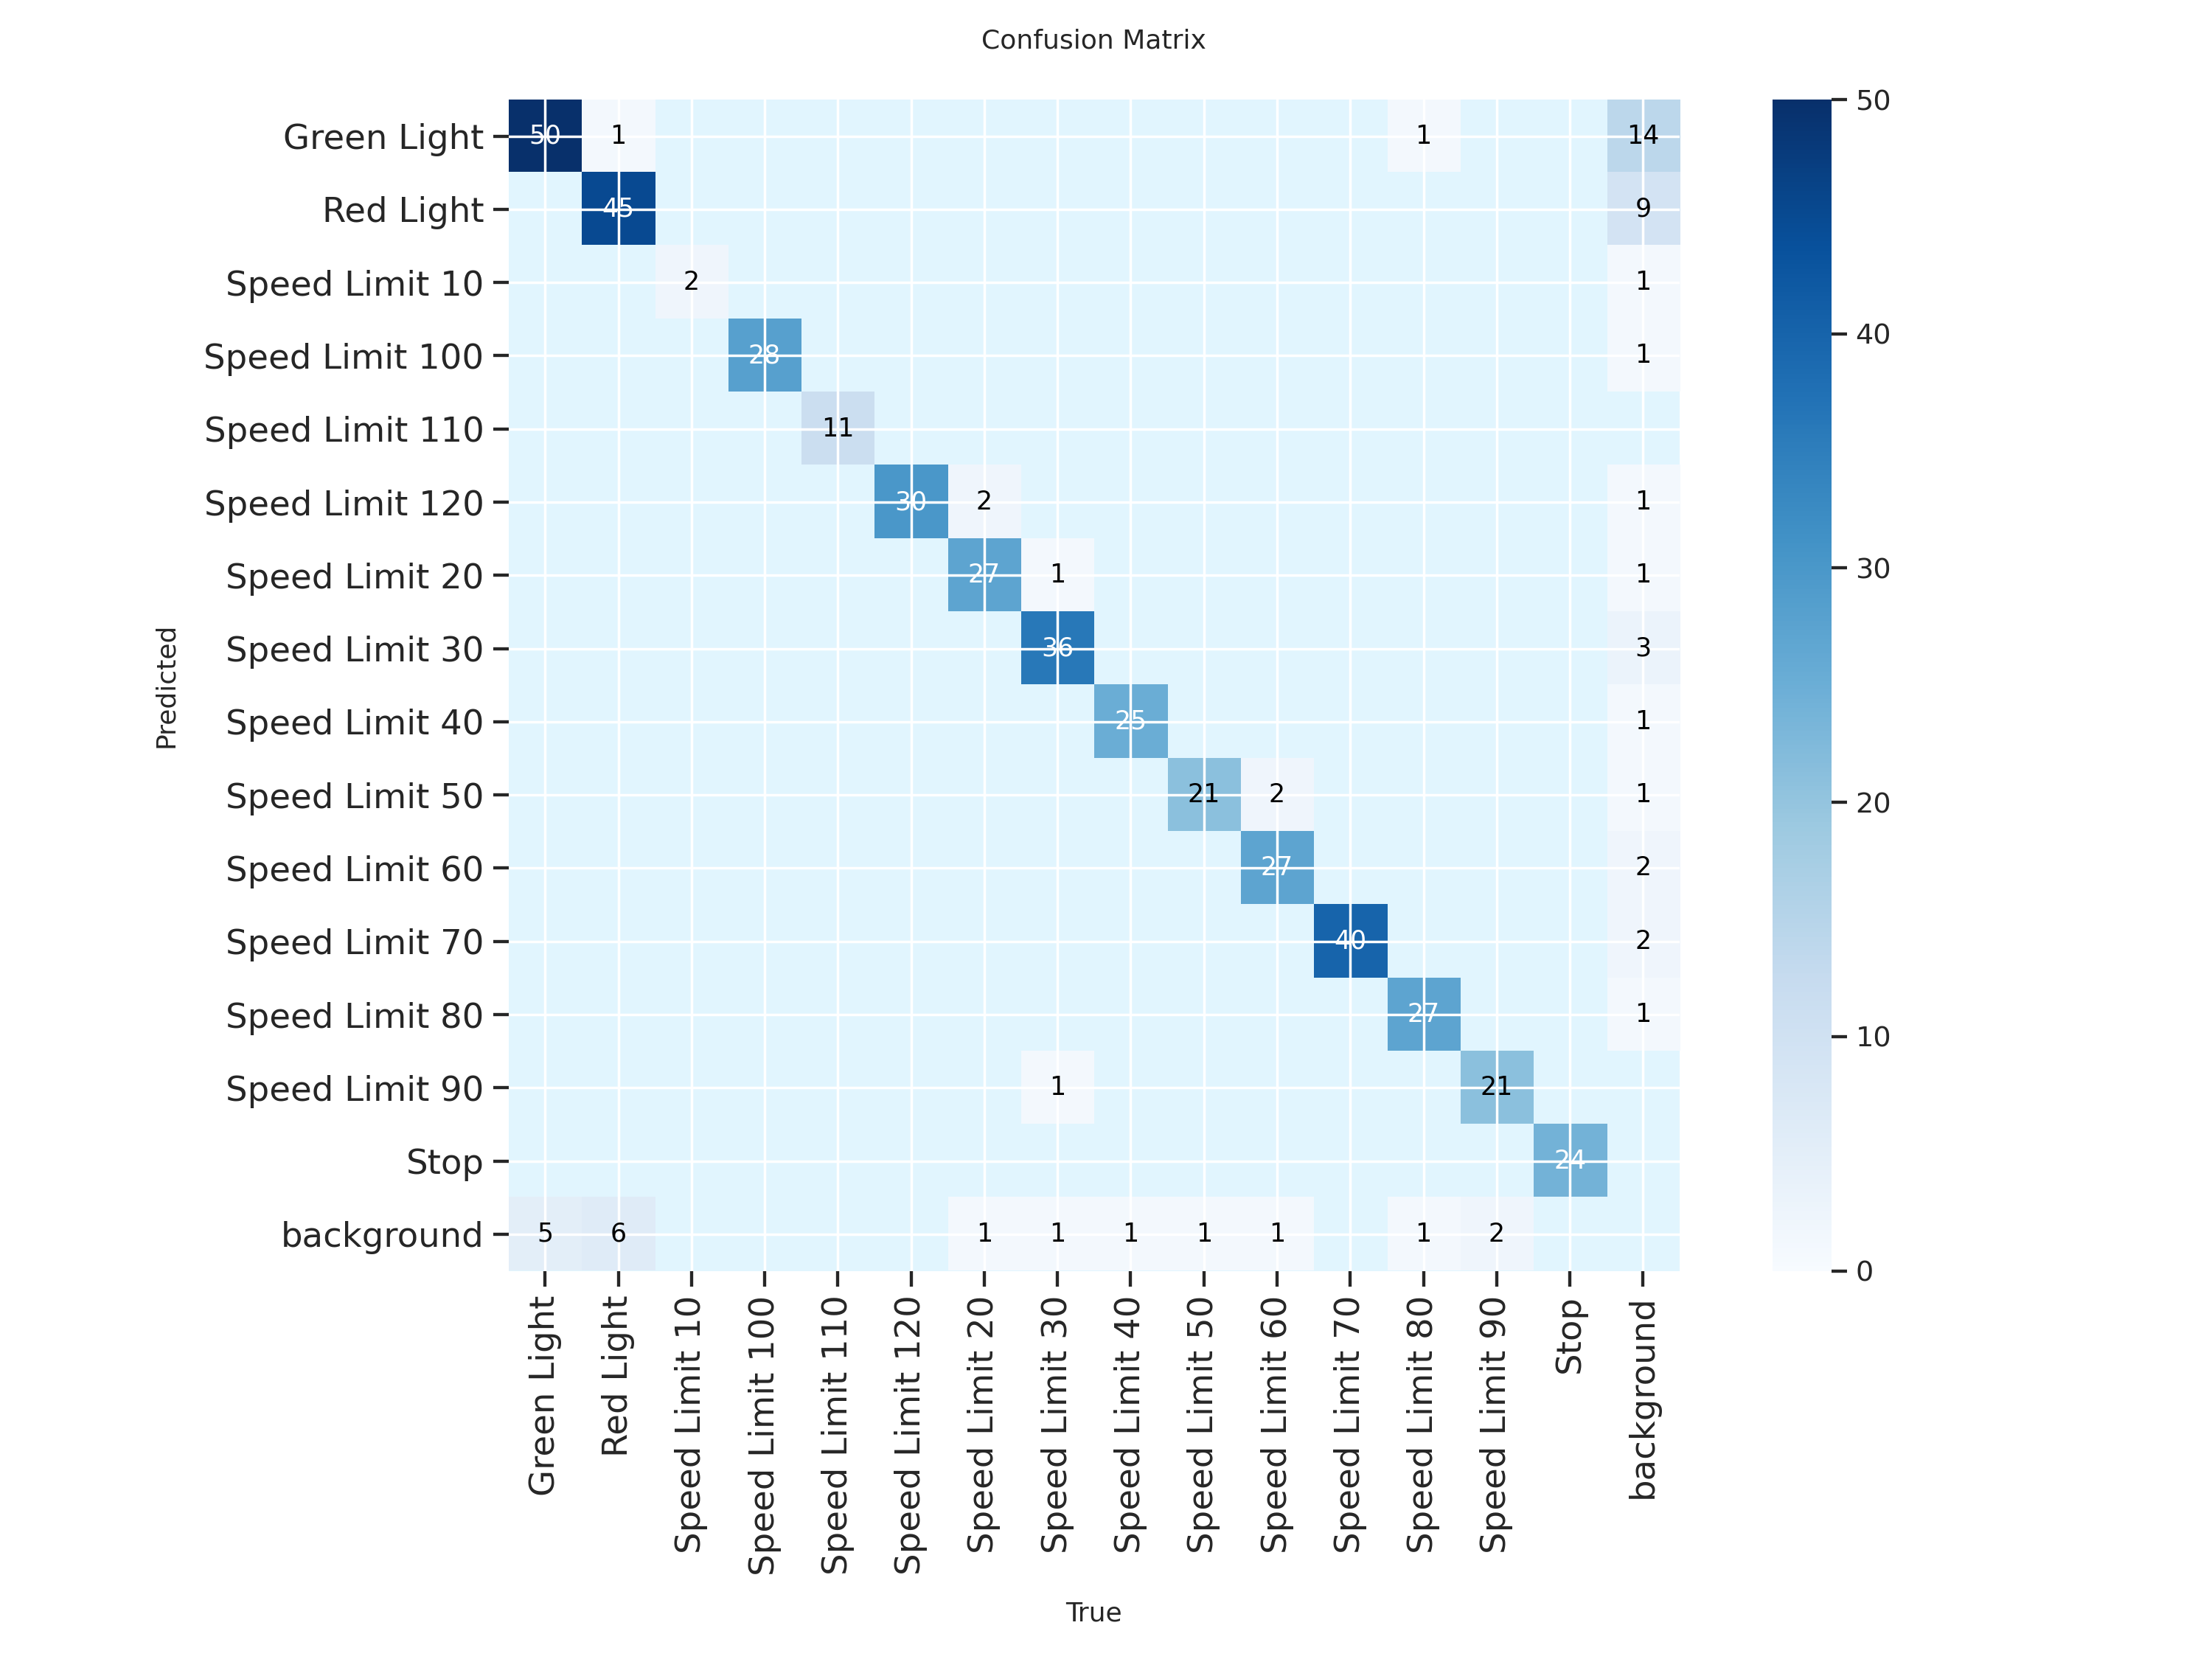

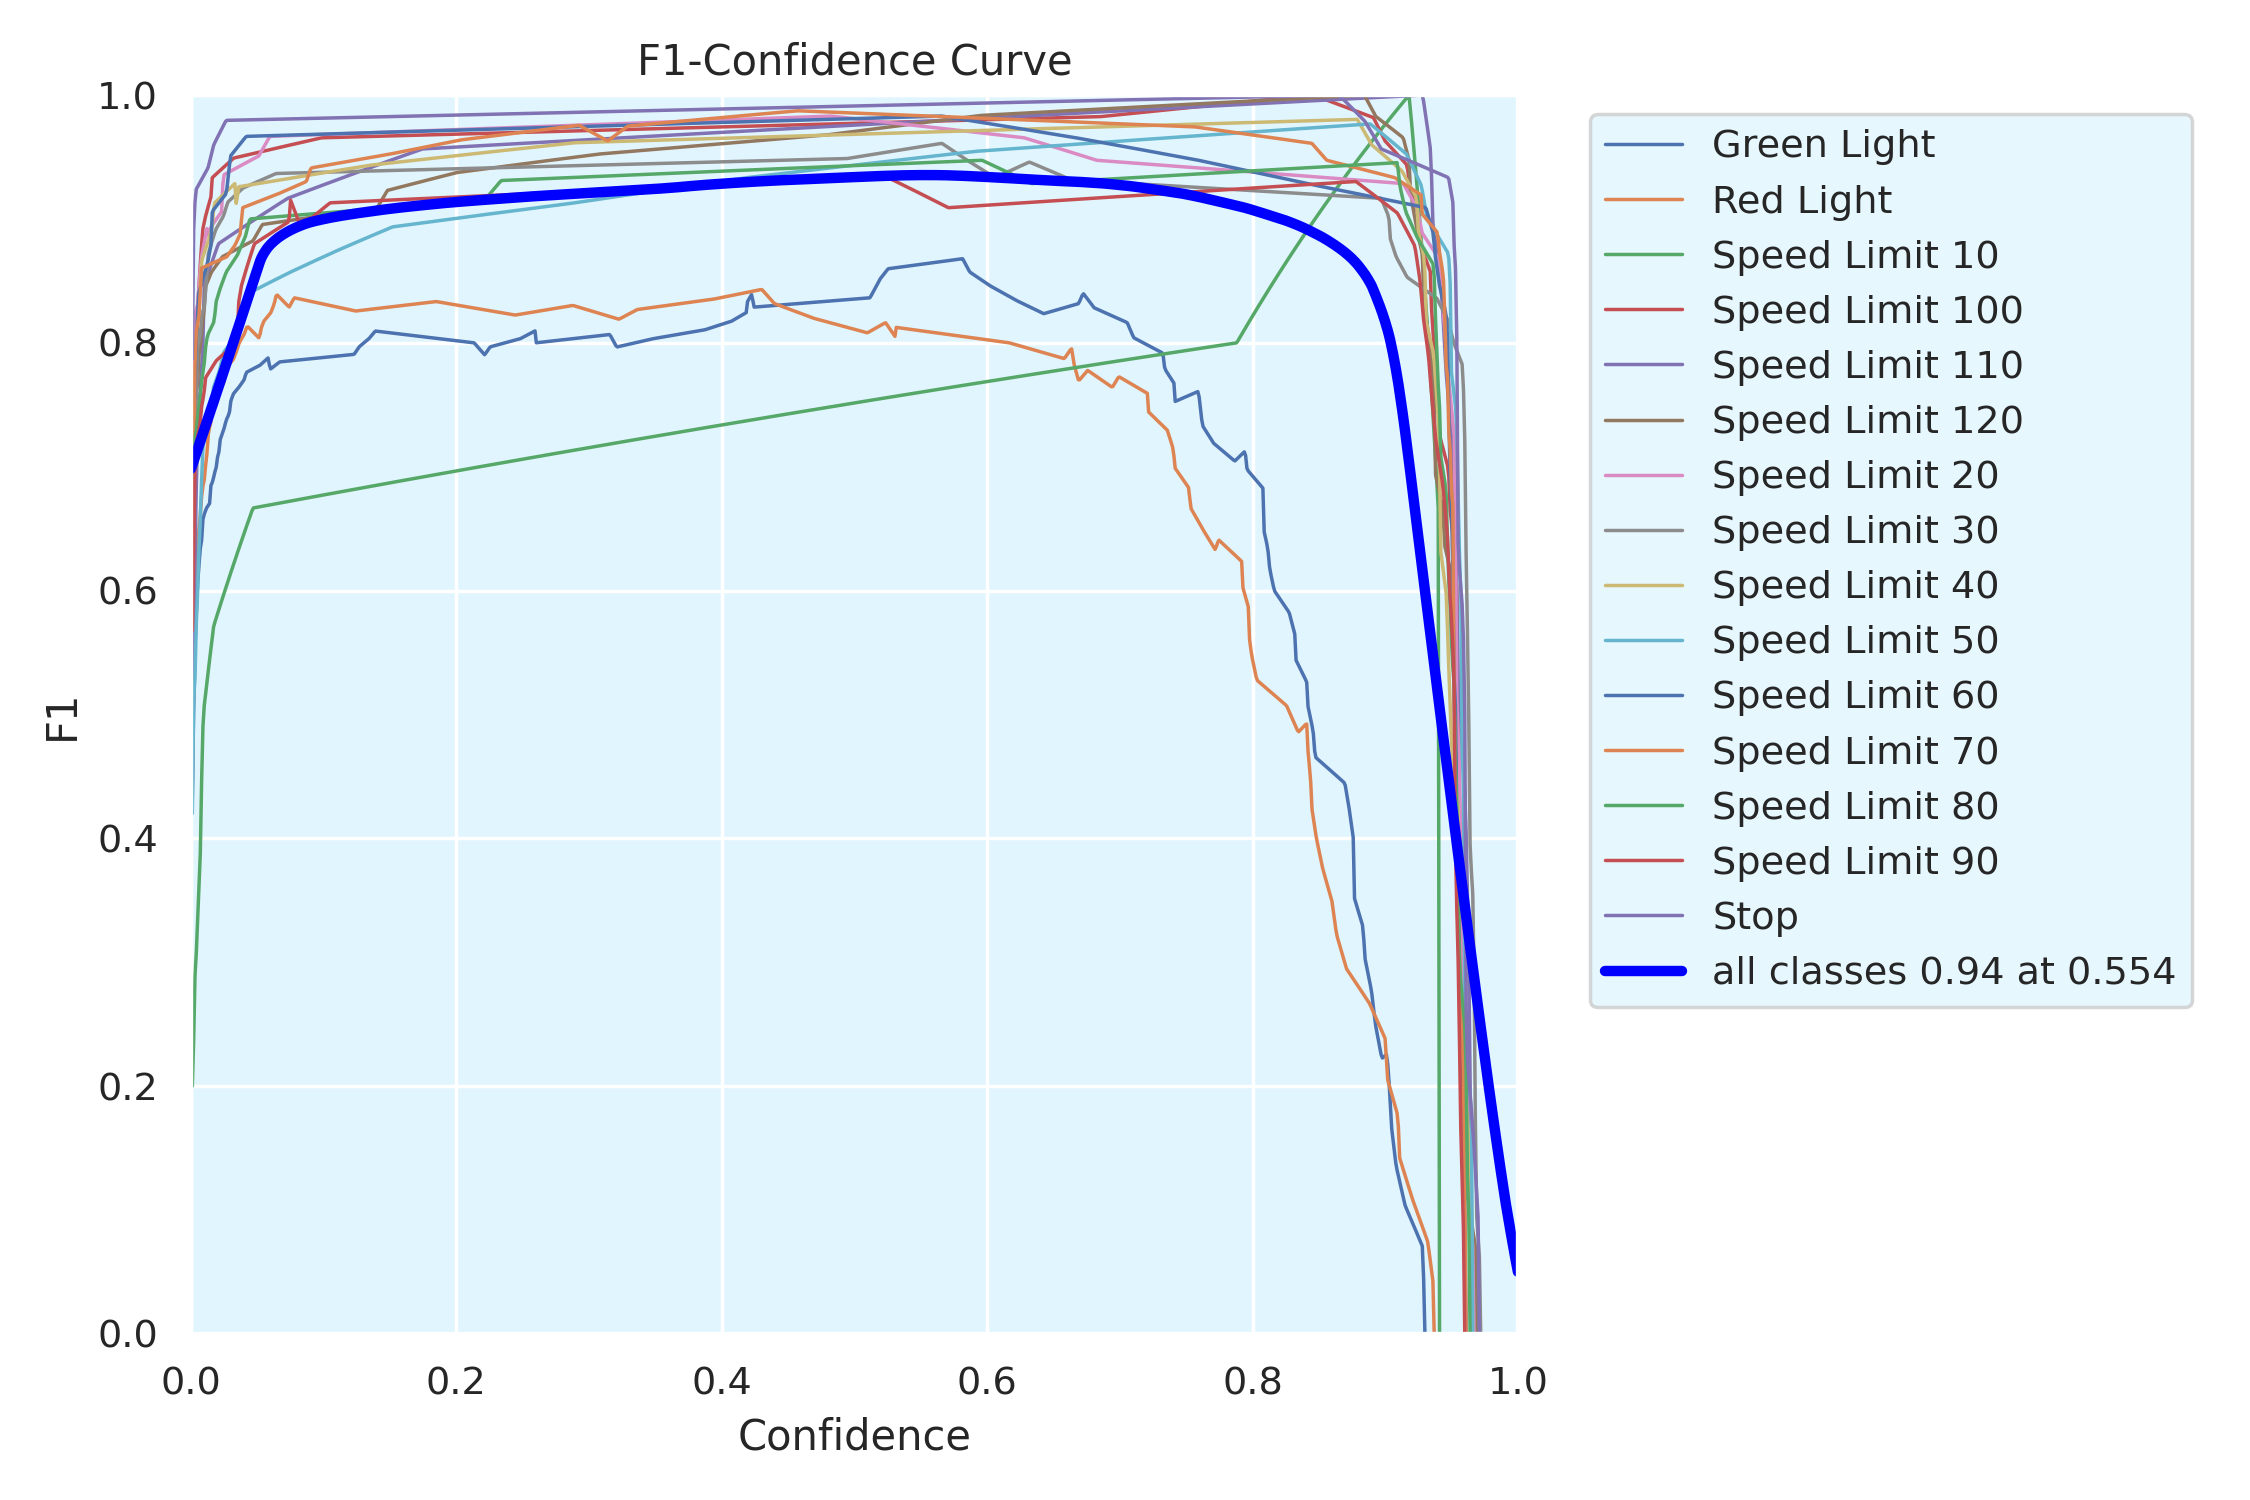

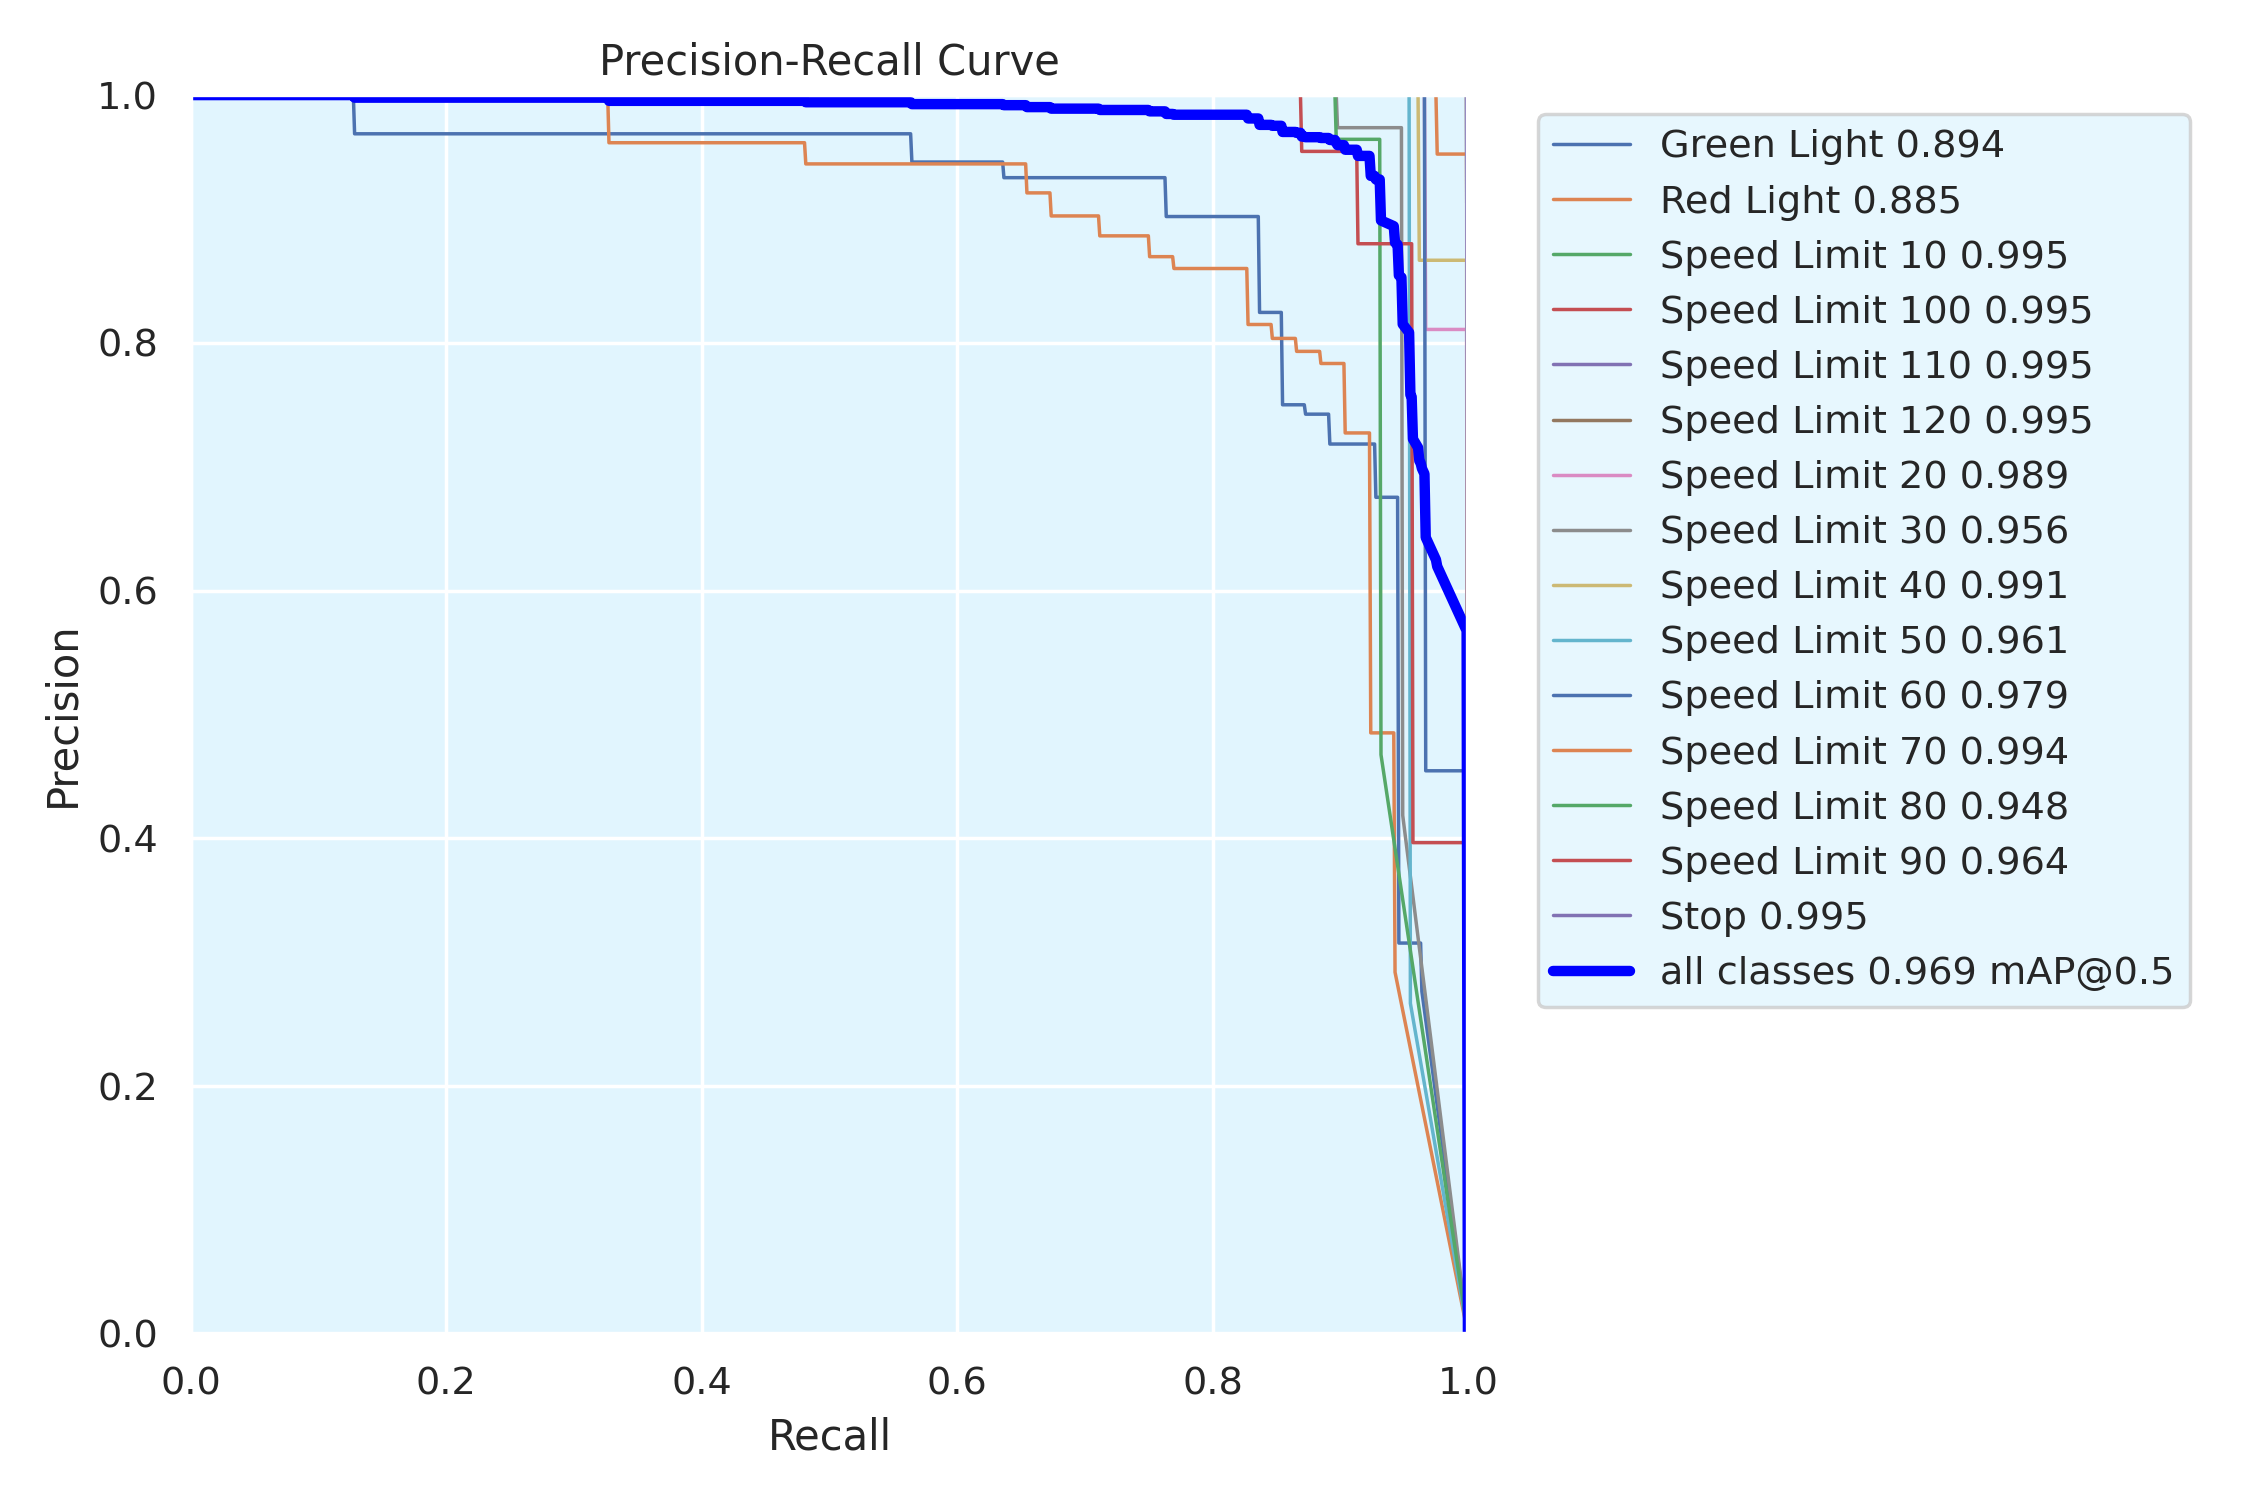

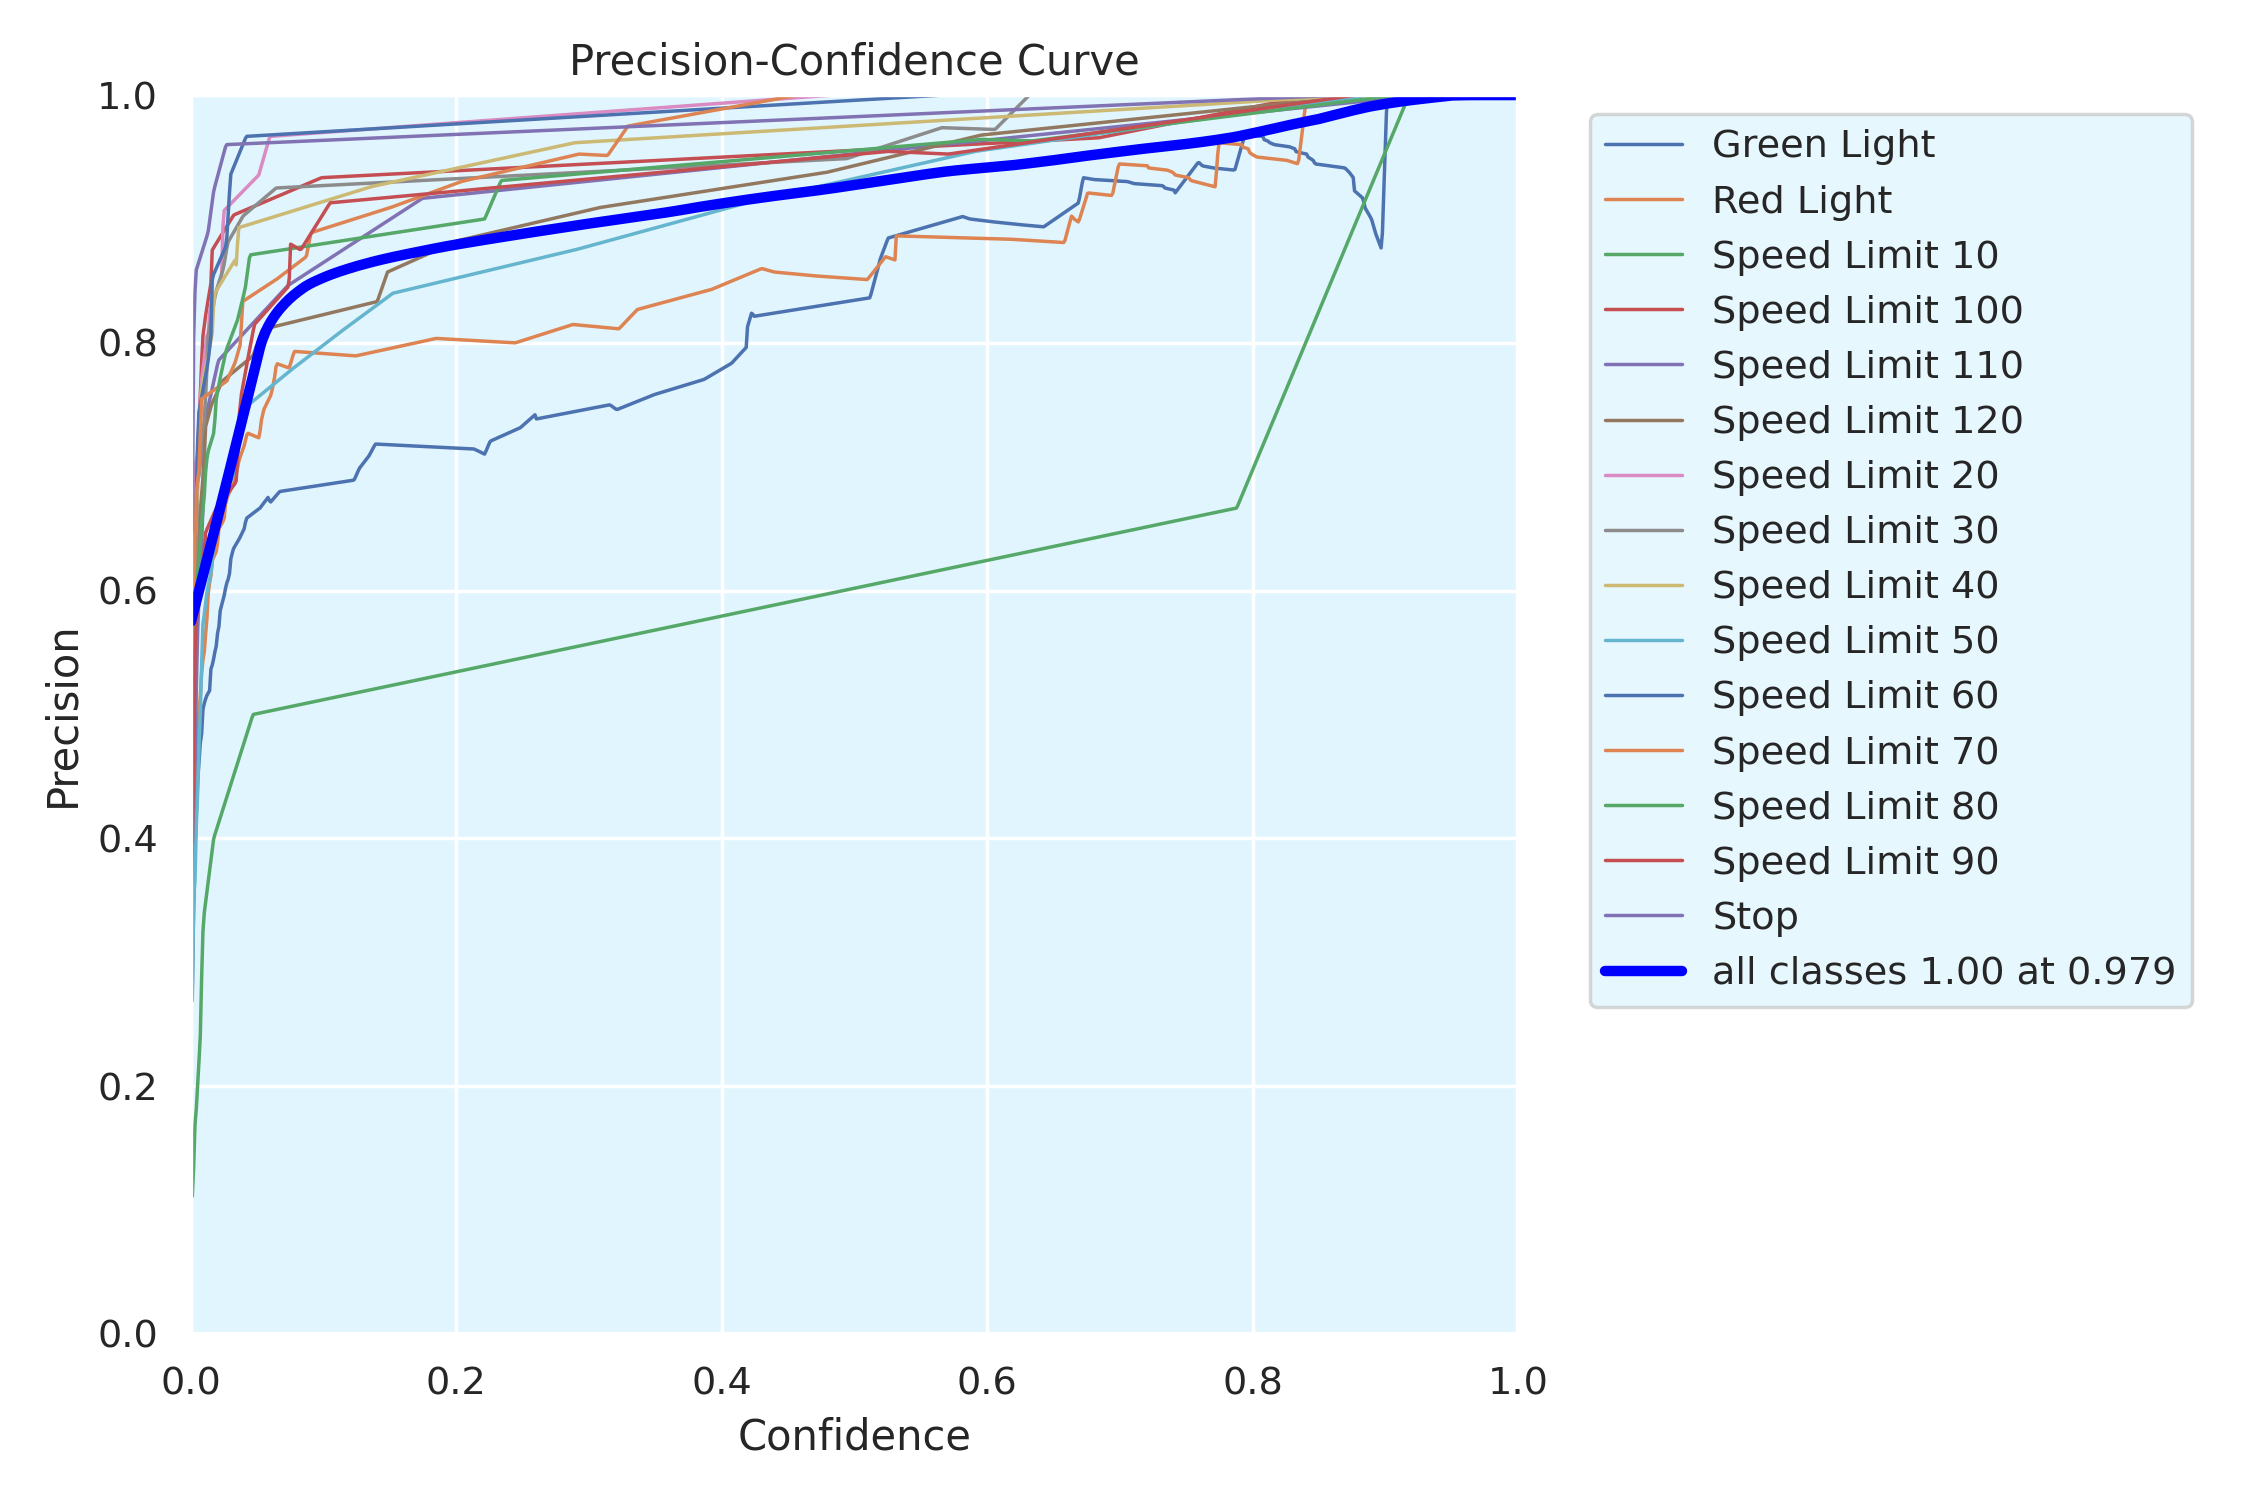

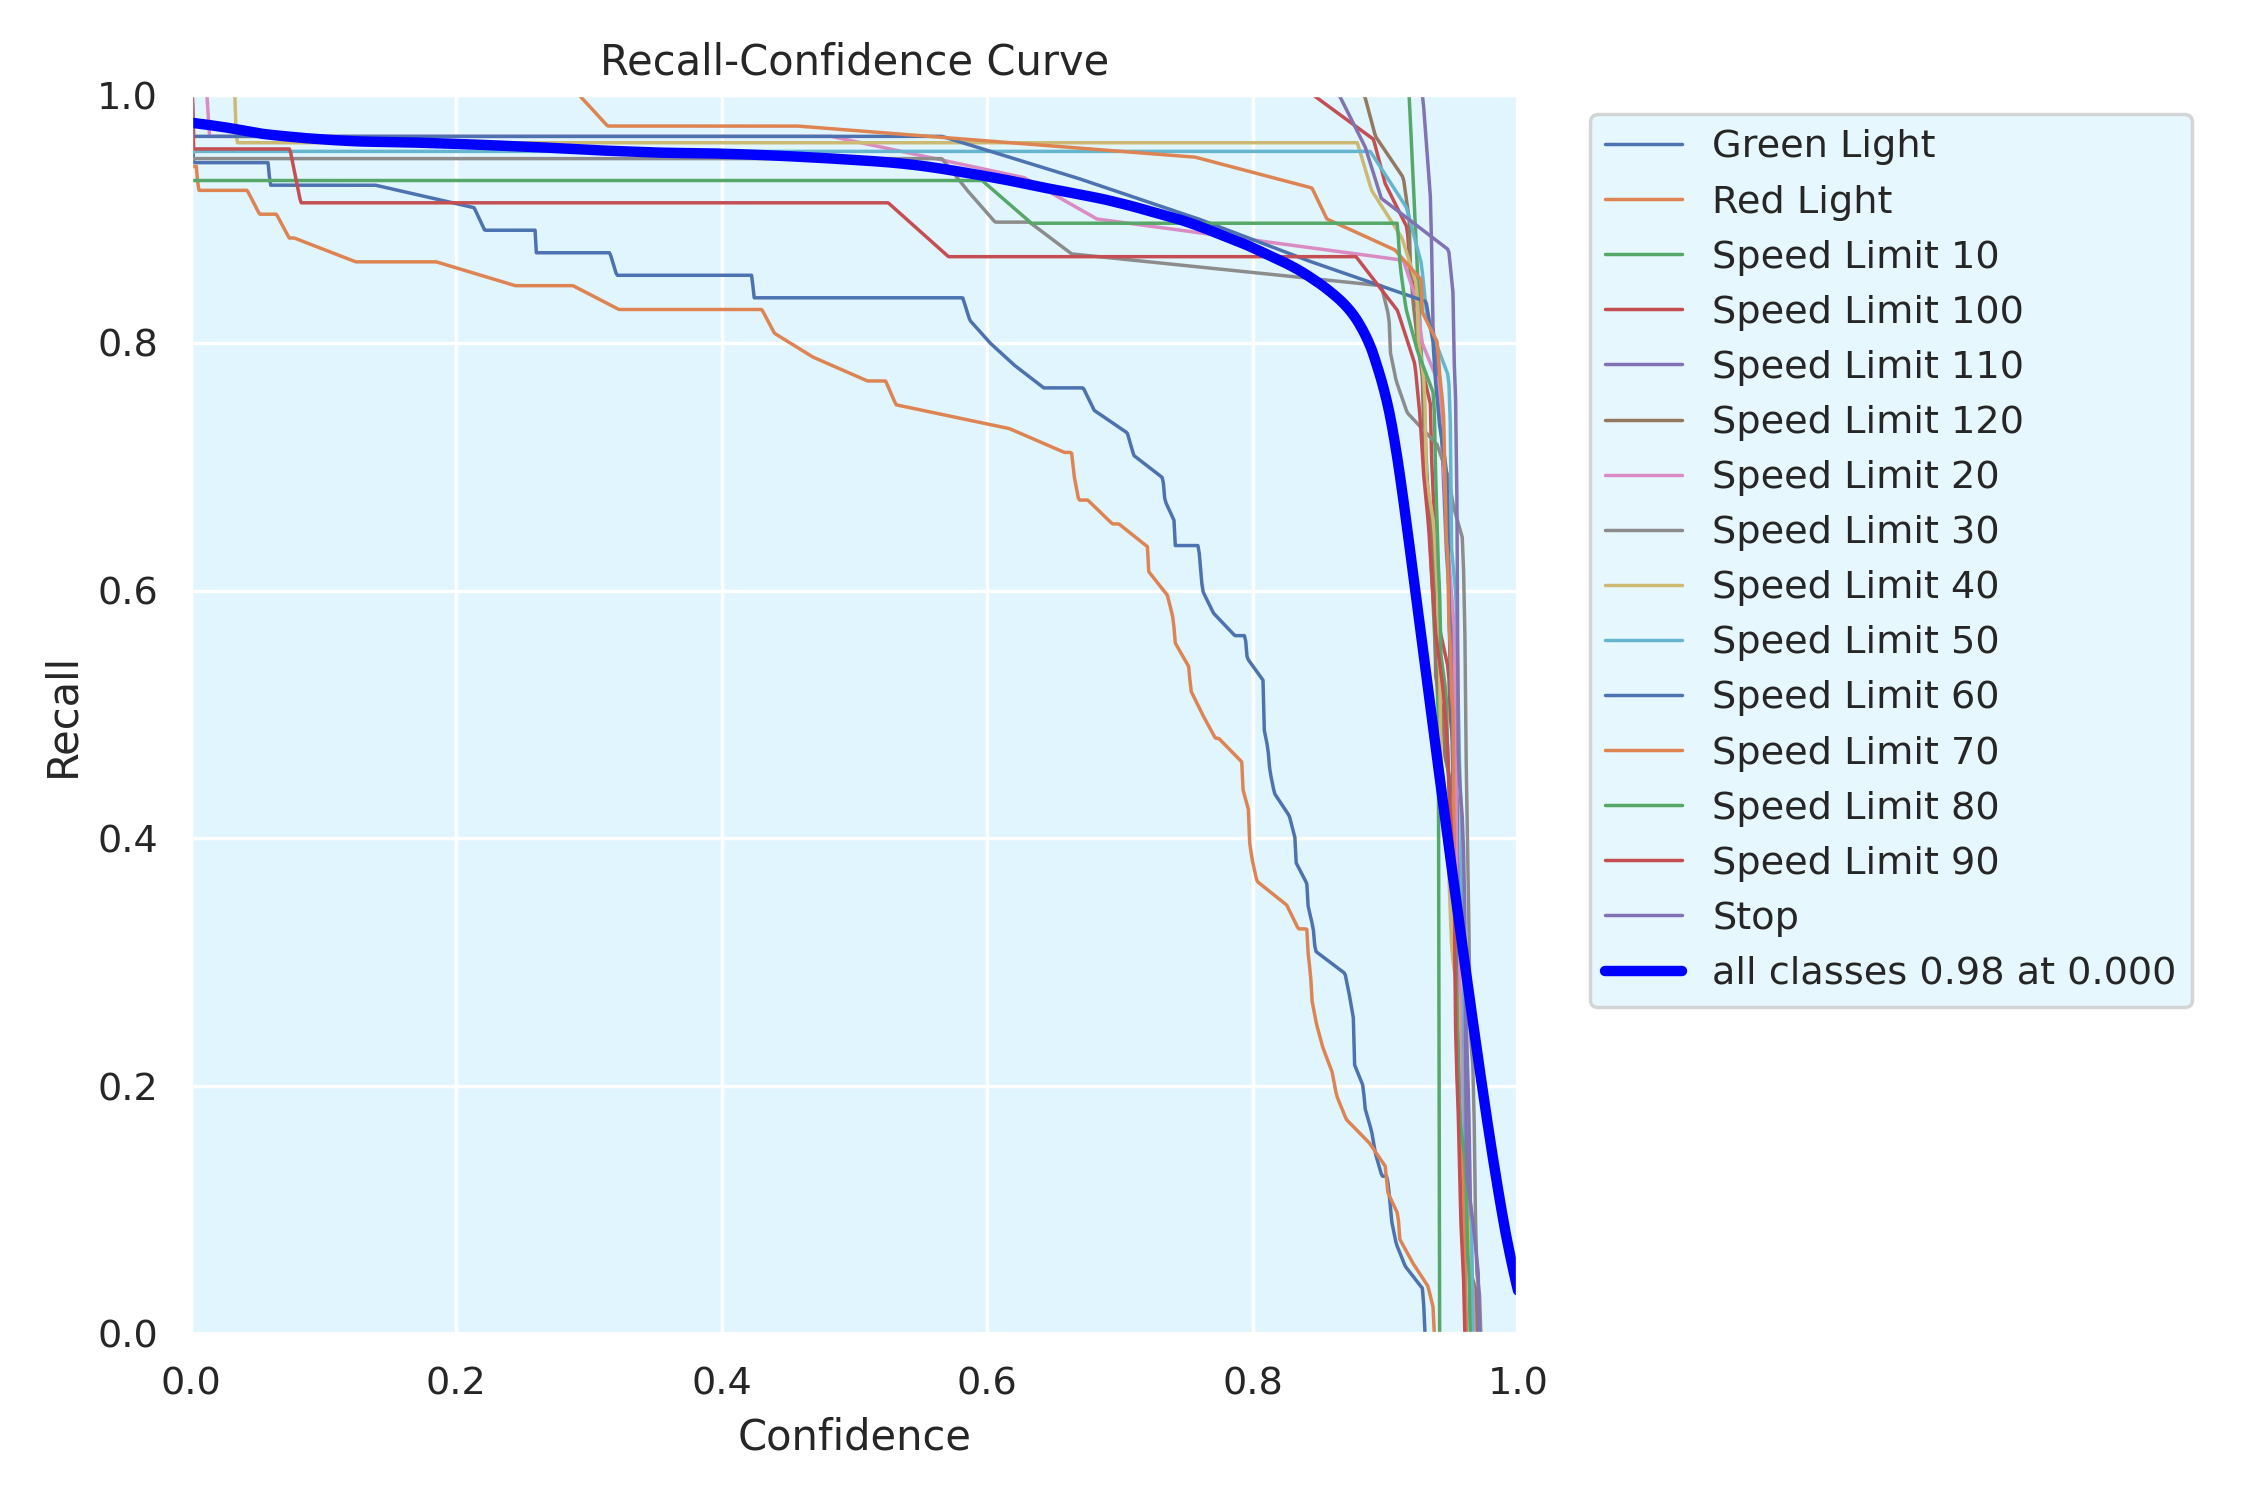

In [64]:
# display trained results
from IPython.display import Image, display

display(Image(filename="/content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/confusion_matrix.png"))
display(Image(filename="/content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/F1_curve.png"))
display(Image(filename="/content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/PR_curve.png"))
display(Image(filename="/content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/P_curve.png"))
display(Image(filename="/content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/R_curve.png"))


Conclusions
- Confusion matrix: model correctly identifying most of the cars.
- F1 Confidence curve: the peak of the curve shows the confidence threshold that yields the highest F1-score.
How sensitive the model's performance is to the confidence threshold: A steep curve indicates that the F1-score changes significantly with the threshold, while a flatter curve suggests less sensitivity.
- Precision-Recall curve: shows how precision and recall change inrelation to each other. The model performs well.
- Precision-Confidence curve: the model is a good indicator of correctness.
- Recall-Confidence curve: the model is finding most of the actual objects (high recall).


Test set

In [65]:
import os
from ultralytics import YOLO
from google.colab import drive

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define the path to your trained model weights in Google Drive
# Replace 'YOLO_Training_Results' and 'car_detection_run' if your paths are different
# You can choose 'best.pt' or 'last.pt'
model_path = '/content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/best.pt' # or 'last.pt'

# Define the path to your data.yaml file
data_yaml_path = '/content/my_car_dataset/data.yaml' # This should be the path you created earlier

# Check if the model weights file exists
if not os.path.exists(model_path):
    print(f"Error: Model weights not found at {model_path}")
else:
    # Load the trained model
    print(f"Loading model from: {model_path}")
    model = YOLO(model_path)

    # Run validation on the test dataset
    print(f"Running validation on data from: {data_yaml_path}")
    # Use the 'split' argument to explicitly specify the validation or test set
    # 'val' will use the 'val' path in data.yaml, 'test' will use the 'test' path
    metrics = model.val(data=data_yaml_path, split='test') # You can change 'test' to 'val' if you want to validate on the validation set

    # Print the metrics
    print("\nValidation Metrics:")
    print(metrics)

    # You can access specific metrics like mAP, precision, recall
    print(f"\nmAP@0.5: {metrics.results_dict['metrics/mAP50(B)']:.4f}")
    print(f"mAP@0.5:0.95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")
    # Depending on your model and task, other metrics might be available
    # You can inspect metrics.results_dict for all available metrics

Loading model from: /content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/best.pt
Running validation on data from: /content/my_car_dataset/data.yaml
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,848,445 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1040.9±315.2 MB/s, size: 21.1 KB)


val: Scanning /content/my_car_dataset/test/labels.cache... 353 images, 0 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.39it/s]


                   all        353        412      0.961      0.951      0.977      0.869
           Green Light         40         52      0.945      0.788      0.898      0.604
             Red Light         36         49      0.903      0.857      0.939      0.641
       Speed Limit 100         24         24      0.977          1      0.995      0.922
       Speed Limit 110         13         13          1      0.972      0.995      0.879
       Speed Limit 120         19         19      0.967          1      0.995      0.933
        Speed Limit 20         20         20      0.941          1      0.995      0.943
        Speed Limit 30         28         28      0.962      0.899      0.958      0.895
        Speed Limit 40         30         31      0.958          1      0.994      0.926
        Speed Limit 50         36         38      0.985          1      0.995      0.909
        Speed Limit 60         33         33      0.959      0.939      0.975      0.889
        Speed Limit 7

Conclusion:
- High precision (0.951). It means when the model says it detected a "car", it's very likely correct. There are a few false positives.
- High recall (0.921). The model is successfully finding most of the actual objects in the images. There are a few false negatives.
- Excellent [redacted link] (0.975): This reinforces the precision and recall. At a standard overlap threshold, the model is performing exceptionally well at both finding objects and getting their bounding boxes roughly correct.
- Good [redacted link]:0.95 (0.846): This shows that the model is not only finding objects but also localizing them quite accurately, even when stricter overlap requirements are applied. A value of 0.846 over this range is strong performance, suggesting the bounding boxes are tight around the objects.
- Overall Conclusion from the metrics:
This model is performing very well on the car detection task based on these metrics. It has a good balance of precision and recall, meaning it's accurately detecting most of the cars without a high rate of incorrect detections. The mAP scores, especially mAP50-95, indicate strong performance in both identifying and precisely localizing the objects.

Improving steps:
1. data-centric approaches
- more data,
- data augmentation (geometric transformations, color jittering, mosaic, ect),
- data quality (incorrect/noisy annotations),
- handling edge cases.
2. model-centric approaches
- larger model for pre-trained,
- hyperparameter turning:
-- learning rate,
-- batch size,
-- optimaizer (Adam),
-- weight decay ( prevent overfitting),
-- image size,
- more epochs,
- diferent anchor boxes,
- regulation.
3. Training process and enviroment:
- monitor training metrics,
- hardware (GPU).

Streamlit

In [99]:
!pip install streamlit
!pip install opencv-python-headless


In [98]:
!pip install ultralytics opencv-python-headless


In [90]:
from google.colab import files
# upload YOLO model(best.pt)
model_path = "/content/drive/MyDrive/YOLO_Training_Results/car_detection_run6/weights/best.pt"

In [93]:
import os

In [106]:
# === Step: Create Streamlit App Script ===


import streamlit as st
import tempfile
import os
import cv2
from ultralytics import YOLO

st.set_page_config(page_title="Traffic Sign Detection", layout="centered")
st.title("🚦 Traffic Sign Detection Demo")

st.markdown("Upload a traffic video to detect signs using a custom YOLOv8 model.")

# Upload video
uploaded_file = st.file_uploader("📤 Upload a video (mp4, avi, mov)", type=["mp4", "avi", "mov"])

if uploaded_file is not None:
    # Save uploaded video to a temporary location
    tfile = tempfile.NamedTemporaryFile(delete=False)
    tfile.write(uploaded_file.read())
    video_path = tfile.name
    st.video(video_path)

    # Load YOLO model
    with st.spinner("🔍 Loading YOLO model..."):
        model = YOLO("best.pt")  # Make sure 'best.pt' is in the same folder

    # Prepare video writer
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    output_path = os.path.join(tempfile.gettempdir(), "output.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    st.info("⚙️ Processing video...")

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        results = model(frame)
        annotated_frame = results[0].plot()
        out.write(annotated_frame)
        frame_count += 1
        if frame_count % 30 == 0:
            st.write(f"Processed {frame_count} frames...")

    cap.release()
    out.release()

    st.success("✅ Done! Here's the result video:")
    st.video(output_path)


# Save the script as app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Streamlit app saved as 'app.py'")


2025-06-25 23:58:43.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 23:58:43.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

✅ Streamlit app saved as 'app.py'


In [107]:
with open("requirements.txt", "w") as f:
    f.write("ultralytics\nopencv-python-headless\nstreamlit")
print("✅ requirements.txt created")


✅ requirements.txt created


In [109]:
# my best.pt is too large for hithub, zip him
import os

# Define the path to your best.pt file in Google Drive
# Make sure this path is correct
model_path = '/content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/best.pt' # Adjust if needed

# Define the desired path and name for the zip file
# This will create the zip file in the same directory as the .pt file
zip_path = model_path + '.zip' # Adds .zip extension to the model file name

# Check if the model file exists before trying to zip it
if os.path.exists(model_path):
    # Use the zip command to compress the file
    # -j option: junk paths (only stores the file name, not the full path)
    # -q option: quiet (don't print verbose output)
    # The command format is: zip [options] zipfile file_to_zip
    print(f"Zipping {model_path} to {zip_path}...")
    !zip -j -q "{zip_path}" "{model_path}"

    # Check if the zip file was created
    if os.path.exists(zip_path):
        print(f"Successfully created zip file: {zip_path}")
        # You can now download this zip file from your Google Drive
        # Or download it directly from the Colab file explorer if it's in /content/
    else:
        print(f"Error: Zip file was not created at {zip_path}.")
else:
    print(f"Error: Model file not found at {model_path}. Cannot zip.")

Zipping /content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/best.pt to /content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/best.pt.zip...
Successfully created zip file: /content/drive/MyDrive/YOLO_Training_Results/car_detection_run/weights/best.pt.zip


Downloading demo videos from google drive into the google colab

In [1]:
from google.colab import drive
import os

# Mount Google Drive if it's not already mounted
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
    print("Google Drive mounted successfully.")
else:
    print("Google Drive already mounted.")

Mounted at /content/drive
Google Drive mounted successfully.


In [2]:
# find the pass to video in google drive
video_path = "https://drive.google.com/file/d/1Cxr3KJh8dndHUhU931u0Xd4iKaBl5C_q/view?usp=share_link"




In [11]:
# construct the colab path to the video
video_path = "/content/drive/MyDrive/car drive.mp4"

In [12]:
# check if file exist
import os

print("Exists:", os.path.exists("/content/drive/MyDrive/car drive.mp4"))


Exists: True


In [13]:

# Define the path to your video file within the mounted Google Drive
video_path_in_colab = '/content/drive/MyDrive/car drive.mp4'

# You can now use the 'video_path_in_colab' variable
# wherever you need to reference your video file in your code.

# Example: Check if the file exists
import os
if os.path.exists(video_path_in_colab):
    print(f"Successfully located video file at: {video_path_in_colab}")

    # Example: Using OpenCV to open the video (make sure opencv-python is installed)
    # !pip install opencv-python -q
    # import cv2
    # cap = cv2.VideoCapture(video_path_in_colab)
    # if cap.isOpened():
    #     print("Video opened successfully with OpenCV!")
    #     cap.release()
    # else:
    #     print("Error opening video with OpenCV.")

else:
    print(f"Error: Video file not found at {video_path_in_colab}.")
    print("Please double-check the path in your Google Drive.")

Successfully located video file at: /content/drive/MyDrive/car drive.mp4
